In [107]:
import itertools
import pandas as pd
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [108]:
match_rep_df = pd.read_csv("../checkpoints/match_rep_df.csv")

match_rep_df = match_rep_df[match_rep_df["sphering"] == True]

match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
6,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.000114,True,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841
8,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.000153,True,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.000044,True,0.174914,57.777778,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",23.255814,0.244983,544244
354,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.000044,True,0.157136,60.000000,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.227059,543826
356,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,True,0.179268,58.888889,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.253483,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567


In [52]:
def aggregate_duplicates(df, non_group_cols):
    """
    Group data on setting columns, calculate the mean for grouped rows
    (which are therefore duplicates).

    The returned dataframe will not contain Assay_Plate_Barcode, since 
    the unique barcodes cannot be reconciled into an aggregated mean, 
    so are therefore dropped.
    """
    # Columns to not be used for grouping
    # non_group_cols = [
    #     "Assay_Plate_Barcode",
    #     "Batch",
    #     "Vendor",
    #     "value_95_replicating",
    #     "Percent_Replicating",
    #     "Size_MB",
    #     "Size_MB_std",
    #     "Percent_Matching",
    #     "value_95_matching",
    #     "cell_count",
    #     "Sites-SubSampled",
    #     "BF_Zplanes", # Ignore since only one BF zplane is used
    #     "brightfield_z_plane_used",
    #     # Remove channel names due to some profiles having "AGP" features 
    #     # and others having "WGPhalloidin" instead
    #     "feature_channels_found",
    #     "channel_names"
    # ]
    # Find the columns that are not in non_group_cols
    diff = list(set(df.columns) - set(non_group_cols))
    # Group df by setting columns, find the mean, then reset the index
    df = df.groupby(diff, dropna=False, as_index=False).mean()
    return df

non_group_cols = [
    "Assay_Plate_Barcode",
    "Batch",
    "Vendor",
    "value_95_replicating",
    "Percent_Replicating",
    "Size_MB",
    "Size_MB_std",
    "Percent_Matching",
    "value_95_matching",
    "cell_count",
    "Sites-SubSampled",
    "BF_Zplanes", # Ignore since only one BF zplane is used
    "brightfield_z_plane_used",
    # Remove channel names due to some profiles having "AGP" features 
    # and others having "WGPhalloidin" instead
    "feature_channels_found",
    "channel_names",
    "vs-brightfield",
    "sphering"
]

group_cols = [col for col in match_rep_df.columns if col not in non_group_cols]

aggregate_duplicates(match_rep_df, non_group_cols)

merged_df = match_rep_df.groupby(group_cols) \
                    .agg({'Assay_Plate_Barcode': '_'.join}) \
                    .reset_index()
merged_df

,Plate_Map_Name,Modality,Images_per_well,Binning,Magnification,Number_of_channels,z_plane,aperture,dry-immersion,vs-brightfield,simultaneous-excitation,sites,sphering,Assay_Plate_Barcode
0,JUMP-MOA_compound_platemap,Confocal,4,1,10,6,12,0.4,dry,yes,2.0,4,True,BRO0117014_10x
1,JUMP-MOA_compound_platemap,Confocal,9,1,20,5,1,1.0,water,no,2.0,9,True,BRO0117033_20xb_BRO0117056_20x
2,JUMP-MOA_compound_platemap,Confocal,9,1,20,5,12,1.0,water,no,2.0,9,True,BRO0117056_20xb
3,JUMP-MOA_compound_platemap,Confocal,9,1,20,6,12,1.0,water,yes,1.0,9,True,BRO01177034_20x
4,JUMP-MOA_compound_platemap,Confocal,9,1,20,6,12,1.0,water,yes,4.0,9,True,BRO0117059_20X
5,JUMP-MOA_compound_platemap,Confocal,9,1,40,6,12,1.0,water,yes,4.0,9,True,BRO0117059_40x


# For the above aggregation, there needs to be a column that aggregates the setings. This string aggregation will be used when plotting the heatmap

In [111]:
# Compare all possible pairs of plates

profile_path = "../../jump-scope/profiles/"


def combination_compare(match_rep_df: pd.DataFrame, vendor: str, profile_path):
    """
    For a given vendor, find all possible pariwise plate comparisons and perform
    the KSTest between all features.

    Returns a dataframe with KSTest statistic and pvalues for each feature.
    Returned DataFrame also includes setting information for each plate (column
    appended with plate1 or plate2, accordingly.)
    """
    vendor_subset = match_rep_df[
        match_rep_df["Vendor"].str.contains(vendor, case=False) &
        ~match_rep_df["Batch"].str.contains("sitesub", case=False) # Exclude sitesub
    ]

    # Find plate combinations 
    plate_combinations = itertools.combinations_with_replacement(vendor_subset["Assay_Plate_Barcode"].to_list(), 2)

    # df to store results
    collated_df = pd.DataFrame()

    for i in plate_combinations:
        print(f"Comparing {i[0]} with {i[1]}")
        # Load profiles
        left_row = match_rep_df[match_rep_df["Assay_Plate_Barcode"] == i[0]]
        left_path = os.path.join(profile_path, left_row["Batch"].values[0], left_row["Assay_Plate_Barcode"].values[0], f"{left_row['Assay_Plate_Barcode'].values[0]}.csv.gz")
        left_profile = pd.read_csv(left_path)

        right_row = match_rep_df[match_rep_df["Assay_Plate_Barcode"] == i[1]]
        right_path = os.path.join(profile_path, right_row["Batch"].values[0], right_row["Assay_Plate_Barcode"].values[0], f"{right_row['Assay_Plate_Barcode'].values[0]}.csv.gz")
        right_profile = pd.read_csv(right_path)

        # Drop string columns
        left_profile_cols = left_profile.select_dtypes(include=['object'])
        left_profile = left_profile.drop(columns=left_profile_cols.columns)
        left_profile = left_profile.loc[:, ~left_profile.columns.str.contains("metadata", case=False)]

        right_profile_cols = right_profile.select_dtypes(include=['object'])
        right_profile = right_profile.drop(columns=right_profile_cols.columns)
        right_profile = right_profile.loc[:, ~right_profile.columns.str.contains("metadata", case=False)]

        # Gather settings for plate1 and plate2 to add to the same row with the corresponding statistic
        left = vendor_subset[vendor_subset["Assay_Plate_Barcode"] == i[0]]
        left = left.add_suffix("_plate1").reset_index(drop=True)
        right = vendor_subset[vendor_subset["Assay_Plate_Barcode"] == i[1]]
        right = right.add_suffix("_plate2").reset_index(drop=True)
        comparison_df = pd.concat([left, right], axis=1)

        for feature in left_profile.columns:
            if not all(left_profile.columns == right_profile.columns):
                non_shared = set(left_profile.columns).symmetric_difference(set(right_profile.columns))
                print(f"Non-shared columns ({len(non_shared)}): {non_shared}")
                raise ValueError(f"cols not shared: {non_shared}")
            kstest_comparison = scipy.stats.kstest(left_profile[feature].values, right_profile[feature].values)

            new_cols = pd.DataFrame.from_dict({
                f"{feature}_kstest_statistic": [kstest_comparison[0]],
                f"{feature}_kstest_pvalue": [kstest_comparison[1]]
            })
            # Append plate_comparison statistics as a column
            comparison_df = pd.concat([comparison_df, new_cols], axis=1)

        # Append two plate comparison as a new row
        collated_df = pd.concat([collated_df, comparison_df], axis=0)
    
    return collated_df

# collated_df = combination_compare(match_rep_df, "nikon", profile_path)


In [112]:
for vend in match_rep_df["Vendor"].unique():
    print(vend)
    if os.path.isfile(f"{vend}_all_plate_comparison.csv"):
        continue
    comb_df = combination_compare(match_rep_df, vend, profile_path)
    comb_df.to_csv(f"{vend}_all_plate_comparison.csv", index=False)

MolDev
Nikon
PE
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_1Plane_P1
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_1Plane_P2
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_1Plane_P3
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_1Plane_P4
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_P1
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_P2
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_P3
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_C_BIN1_P4
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_NC_BIN1_1Plane_P1
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_NC_BIN1_1Plane_P2
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_NC_BIN1_1Plane_P3
Comparing CP_Broad_Phenix_C_BIN1_1Plane_P1 with CP_Broad_Phenix_NC_BIN1_1Plane_P4
Comparing CP_Broad_Phenix_C_BIN1_1Pl

ValueError: cols not shared: {'Nuclei_Texture_DifferenceEntropy_ER_3_02_256', 'Nuclei_Texture_DifferenceVariance_DNA_20_03_256', 'Cells_Texture_SumAverage_ER_20_02_256', 'Cells_Texture_SumVariance_DNA_3_01_256', 'Cytoplasm_Texture_Contrast_ER_3_03_256', 'Nuclei_Texture_Variance_RNA_3_01_256', 'Cells_Texture_SumAverage_ER_20_03_256', 'Nuclei_Texture_SumVariance_Mito_3_02_256', 'Cells_Neighbors_SecondClosestDistance_5', 'Cytoplasm_Texture_DifferenceVariance_DNA_20_03_256', 'Cells_Texture_SumEntropy_DNA_20_02_256', 'Nuclei_Neighbors_PercentTouching_2', 'Cells_Texture_InfoMeas1_ER_20_00_256', 'Nuclei_Texture_InfoMeas1_RNA_20_02_256', 'Cells_Texture_SumAverage_WGPhalloidin_3_03_256', 'Cells_Texture_DifferenceEntropy_ER_20_02_256', 'Cells_Texture_SumVariance_RNA_3_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_3_02_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_3_01_256', 'Cytoplasm_Texture_SumAverage_Mito_20_02_256', 'Cytoplasm_Texture_SumEntropy_RNA_20_02_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_20_01_256', 'Cells_Texture_SumEntropy_Mito_20_02_256', 'Cytoplasm_Texture_Contrast_ER_20_00_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_Entropy_Mito_20_03_256', 'Cells_Texture_InfoMeas1_Mito_3_00_256', 'Cells_Texture_SumAverage_DNA_20_00_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_SumEntropy_Mito_3_01_256', 'Nuclei_Neighbors_NumberOfNeighbors_1', 'Cells_Texture_Variance_WGPhalloidin_3_03_256', 'Nuclei_Texture_DifferenceVariance_RNA_20_00_256', 'Nuclei_Texture_DifferenceVariance_RNA_3_02_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_3_00_256', 'Cells_Texture_Variance_ER_20_00_256', 'Nuclei_Texture_InfoMeas1_ER_3_02_256', 'Cells_Texture_SumAverage_Mito_20_00_256', 'Nuclei_Texture_Contrast_RNA_3_02_256', 'Cells_Texture_Contrast_Mito_3_01_256', 'Cytoplasm_Texture_Contrast_DNA_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_20_03_256', 'Nuclei_Texture_SumAverage_DNA_20_00_256', 'Nuclei_Texture_SumVariance_Mito_3_00_256', 'Cells_Texture_Variance_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_20_02_256', 'Cells_Neighbors_SecondClosestObjectNumber_10', 'Cells_Texture_Contrast_RNA_20_01_256', 'Cytoplasm_Texture_SumEntropy_ER_20_01_256', 'Cells_Texture_DifferenceEntropy_RNA_20_01_256', 'Nuclei_Texture_Contrast_ER_3_03_256', 'Cells_Texture_Contrast_ER_3_02_256', 'Cytoplasm_Texture_SumEntropy_DNA_3_00_256', 'Cells_Texture_DifferenceVariance_RNA_3_01_256', 'Nuclei_Texture_SumVariance_RNA_20_02_256', 'Nuclei_Texture_AngularSecondMoment_ER_3_03_256', 'Cells_Texture_Contrast_DNA_20_00_256', 'Cells_Texture_Contrast_ER_20_03_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_Correlation_DNA_20_03_256', 'Cytoplasm_Texture_AngularSecondMoment_RNA_20_02_256', 'Cells_Texture_AngularSecondMoment_RNA_3_03_256', 'Nuclei_Texture_Variance_Mito_3_01_256', 'Cells_Texture_SumVariance_DNA_3_02_256', 'Cytoplasm_Texture_Contrast_ER_3_00_256', 'Nuclei_Texture_InfoMeas1_Mito_20_03_256', 'Cytoplasm_Texture_SumVariance_RNA_3_02_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_3_03_256', 'Nuclei_Texture_Contrast_DNA_20_03_256', 'Nuclei_Texture_Contrast_WGPhalloidin_3_00_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_3_03_256', 'Cells_Texture_InfoMeas2_RNA_20_02_256', 'Cytoplasm_Texture_SumAverage_ER_3_00_256', 'Nuclei_Texture_DifferenceEntropy_ER_3_03_256', 'Nuclei_Texture_DifferenceVariance_ER_3_02_256', 'Cytoplasm_Texture_SumAverage_Mito_3_02_256', 'Cells_Texture_InfoMeas1_ER_20_03_256', 'Nuclei_Texture_Variance_Mito_20_03_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_20_03_256', 'Cells_Texture_Entropy_RNA_20_03_256', 'Nuclei_Texture_AngularSecondMoment_DNA_20_01_256', 'Cytoplasm_Texture_Entropy_ER_3_02_256', 'Nuclei_Texture_SumVariance_ER_20_00_256', 'Cells_Texture_SumEntropy_ER_3_03_256', 'Cells_Texture_SumVariance_Mito_20_03_256', 'Cytoplasm_Texture_Contrast_RNA_20_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_20_03_256', 'Cytoplasm_Texture_SumAverage_DNA_3_02_256', 'Cells_Texture_SumEntropy_Mito_3_01_256', 'Cytoplasm_Texture_InfoMeas2_DNA_20_02_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_InfoMeas2_Mito_3_00_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_3_01_256', 'Cells_Texture_Correlation_DNA_3_00_256', 'Cells_Neighbors_NumberOfNeighbors_10', 'Cells_Texture_Entropy_DNA_3_02_256', 'Cells_Texture_AngularSecondMoment_ER_3_00_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_3_02_256', 'Nuclei_Texture_Correlation_WGPhalloidin_20_00_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_3_00_256', 'Nuclei_Texture_SumVariance_DNA_3_00_256', 'Cells_Texture_Variance_DNA_20_02_256', 'Cells_Texture_Correlation_WGPhalloidin_3_03_256', 'Nuclei_Texture_SumEntropy_ER_3_03_256', 'Cells_Texture_DifferenceVariance_ER_20_01_256', 'Cytoplasm_Texture_Contrast_Mito_3_01_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_20_03_256', 'Cells_Texture_InverseDifferenceMoment_Mito_20_01_256', 'Cytoplasm_Texture_SumEntropy_ER_3_02_256', 'Cells_Neighbors_AngleBetweenNeighbors_5', 'Cells_Texture_AngularSecondMoment_DNA_20_02_256', 'Cytoplasm_Texture_InfoMeas1_DNA_20_01_256', 'Cells_Texture_Entropy_Mito_3_02_256', 'Nuclei_Texture_Correlation_Mito_3_01_256', 'Nuclei_Texture_SumEntropy_ER_20_00_256', 'Cytoplasm_Texture_AngularSecondMoment_RNA_20_01_256', 'Cytoplasm_Texture_Contrast_ER_20_03_256', 'Cells_Texture_DifferenceEntropy_RNA_3_01_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_3_03_256', 'Nuclei_Texture_DifferenceVariance_ER_3_03_256', 'Nuclei_Texture_Variance_WGPhalloidin_3_01_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_InfoMeas1_ER_20_00_256', 'Cells_Texture_SumAverage_WGPhalloidin_20_00_256', 'Nuclei_Texture_SumAverage_DNA_3_02_256', 'Cells_Texture_Entropy_DNA_3_00_256', 'Cells_Texture_AngularSecondMoment_DNA_3_03_256', 'Cells_Texture_InfoMeas2_Mito_3_03_256', 'Cytoplasm_Texture_SumVariance_ER_3_01_256', 'Cells_Texture_Variance_DNA_3_00_256', 'Nuclei_Texture_SumAverage_RNA_20_01_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_DifferenceVariance_ER_20_02_256', 'Cytoplasm_Texture_SumVariance_DNA_20_01_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_3_01_256', 'Nuclei_Texture_InfoMeas1_Mito_20_00_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_SumAverage_ER_3_03_256', 'Cells_Texture_Variance_RNA_3_01_256', 'Cytoplasm_Texture_Variance_DNA_20_01_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_3_03_256', 'Nuclei_Texture_SumEntropy_DNA_20_01_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_20_02_256', 'Nuclei_Texture_Entropy_RNA_3_00_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_20_03_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_20_01_256', 'Nuclei_Texture_InfoMeas1_RNA_20_03_256', 'Cytoplasm_Texture_Contrast_ER_3_01_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_20_02_256', 'Nuclei_Texture_Variance_WGPhalloidin_3_02_256', 'Cells_Texture_Entropy_ER_20_01_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_3_01_256', 'Nuclei_Neighbors_SecondClosestObjectNumber_1', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_20_03_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_3_00_256', 'Cells_Texture_Correlation_Mito_20_03_256', 'Cells_Texture_InfoMeas1_RNA_20_01_256', 'Cells_Texture_Correlation_ER_3_00_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_Contrast_DNA_3_00_256', 'Nuclei_Texture_SumAverage_Mito_3_01_256', 'Nuclei_Texture_Correlation_ER_20_00_256', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_20_01_256', 'Cells_Texture_SumAverage_WGPhalloidin_3_01_256', 'Cells_Texture_InverseDifferenceMoment_DNA_20_02_256', 'Cytoplasm_Texture_Variance_DNA_20_02_256', 'Cells_Texture_Correlation_WGPhalloidin_3_00_256', 'Cells_Texture_InverseDifferenceMoment_RNA_3_01_256', 'Nuclei_Texture_DifferenceEntropy_RNA_3_03_256', 'Nuclei_Texture_InverseDifferenceMoment_ER_3_03_256', 'Cytoplasm_Texture_AngularSecondMoment_RNA_3_00_256', 'Nuclei_Texture_InfoMeas1_RNA_3_02_256', 'Cytoplasm_Texture_Contrast_RNA_20_03_256', 'Cytoplasm_Texture_InfoMeas1_Mito_20_02_256', 'Cytoplasm_Texture_SumEntropy_Mito_20_00_256', 'Cells_Texture_Contrast_WGPhalloidin_3_03_256', 'Cells_Texture_Correlation_RNA_20_01_256', 'Cells_Texture_InfoMeas2_Mito_20_00_256', 'Cells_Texture_SumEntropy_ER_20_00_256', 'Cells_Texture_SumAverage_Mito_20_03_256', 'Cells_Texture_SumAverage_ER_20_01_256', 'Nuclei_Texture_AngularSecondMoment_Mito_20_03_256', 'Nuclei_Texture_Contrast_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_Variance_RNA_3_03_256', 'Nuclei_Texture_AngularSecondMoment_DNA_20_02_256', 'Cytoplasm_Texture_Correlation_Mito_3_03_256', 'Cells_Texture_DifferenceVariance_ER_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_3_03_256', 'Cells_Texture_AngularSecondMoment_RNA_20_00_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_20_02_256', 'Cells_Texture_SumEntropy_Mito_3_00_256', 'Cytoplasm_Texture_Variance_ER_3_01_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_20_01_256', 'Cells_Texture_Contrast_Mito_3_02_256', 'Cells_Texture_InfoMeas1_DNA_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_20_02_256', 'Nuclei_Texture_Correlation_Mito_3_00_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_20_02_256', 'Cells_Texture_InfoMeas2_RNA_3_03_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_20_00_256', 'Nuclei_Texture_InfoMeas1_Mito_3_00_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_20_00_256', 'Nuclei_Texture_InfoMeas2_Mito_3_01_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_3_00_256', 'Cells_Texture_SumEntropy_Mito_20_03_256', 'Cells_Texture_Correlation_ER_20_00_256', 'Cytoplasm_Texture_Entropy_Mito_3_00_256', 'Nuclei_Texture_Entropy_DNA_3_02_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_3_02_256', 'Cells_Texture_InfoMeas2_RNA_3_02_256', 'Cells_Texture_AngularSecondMoment_ER_20_03_256', 'Nuclei_Texture_Correlation_Mito_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_20_02_256', 'Cells_Texture_Entropy_ER_3_03_256', 'Cytoplasm_Texture_SumVariance_DNA_3_00_256', 'Nuclei_Texture_DifferenceVariance_RNA_20_03_256', 'Nuclei_Texture_AngularSecondMoment_ER_20_00_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_3_02_256', 'Nuclei_Texture_Correlation_RNA_20_00_256', 'Nuclei_Texture_Entropy_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_SumEntropy_RNA_3_00_256', 'Cytoplasm_Texture_DifferenceEntropy_ER_20_02_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_3_02_256', 'Cells_Texture_SumVariance_RNA_20_01_256', 'Nuclei_Neighbors_NumberOfNeighbors_2', 'Nuclei_Texture_SumEntropy_WGPhalloidin_20_02_256', 'Cells_Texture_Entropy_Mito_3_01_256', 'Cells_Texture_Correlation_ER_3_02_256', 'Cells_Texture_SumEntropy_DNA_3_03_256', 'Cells_Texture_SumVariance_RNA_20_02_256', 'Cells_Texture_SumAverage_RNA_3_02_256', 'Nuclei_Texture_DifferenceEntropy_RNA_3_00_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_3_00_256', 'Cytoplasm_Texture_SumVariance_Mito_20_01_256', 'Cells_Texture_Variance_Mito_3_02_256', 'Cytoplasm_Texture_DifferenceEntropy_Mito_3_01_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_3_01_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_20_00_256', 'Cells_Texture_InfoMeas1_DNA_3_02_256', 'Cytoplasm_Texture_SumEntropy_Mito_3_00_256', 'Nuclei_Texture_Entropy_WGPhalloidin_3_02_256', 'Nuclei_Texture_DifferenceEntropy_RNA_3_01_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_3_03_256', 'Nuclei_Texture_DifferenceVariance_Mito_20_01_256', 'Cells_Texture_SumAverage_Mito_20_02_256', 'Nuclei_Texture_Variance_DNA_3_02_256', 'Cells_Texture_Entropy_Mito_20_01_256', 'Nuclei_Texture_Entropy_Mito_20_03_256', 'Cytoplasm_Texture_Variance_ER_20_03_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_20_01_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_3_03_256', 'Cells_Texture_Correlation_RNA_3_03_256', 'Cytoplasm_Texture_AngularSecondMoment_RNA_20_00_256', 'Cells_Texture_Variance_Mito_20_00_256', 'Cells_Texture_SumAverage_WGPhalloidin_3_00_256', 'Nuclei_Texture_Entropy_DNA_3_00_256', 'Nuclei_Texture_InfoMeas2_ER_3_00_256', 'Cells_Texture_Variance_Mito_3_01_256', 'Cells_Neighbors_AngleBetweenNeighbors_10', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_20_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_3_01_256', 'Cytoplasm_Texture_InfoMeas2_DNA_3_00_256', 'Cells_Texture_Contrast_DNA_3_02_256', 'Nuclei_Texture_DifferenceEntropy_ER_20_02_256', 'Nuclei_Texture_SumAverage_Mito_3_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_3_01_256', 'Cells_Texture_InfoMeas2_DNA_20_00_256', 'Cells_Texture_SumVariance_RNA_20_03_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_20_02_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_20_01_256', 'Nuclei_Texture_AngularSecondMoment_ER_20_02_256', 'Nuclei_Texture_InfoMeas2_RNA_20_01_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_3_03_256', 'Cells_Texture_AngularSecondMoment_RNA_3_02_256', 'Cells_Texture_AngularSecondMoment_Mito_3_01_256', 'Cells_Texture_SumVariance_Mito_20_00_256', 'Nuclei_Texture_AngularSecondMoment_ER_20_01_256', 'Cytoplasm_Texture_Variance_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_SumVariance_DNA_3_03_256', 'Nuclei_Texture_InfoMeas1_DNA_3_01_256', 'Nuclei_Texture_InfoMeas2_ER_20_03_256', 'Nuclei_Texture_SumEntropy_WGPhalloidin_20_00_256', 'Nuclei_Texture_Variance_Mito_3_00_256', 'Cells_Texture_Correlation_DNA_20_02_256', 'Cytoplasm_Texture_SumEntropy_DNA_3_02_256', 'Cells_Texture_Correlation_WGPhalloidin_3_01_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_20_00_256', 'Nuclei_Texture_SumEntropy_RNA_20_02_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_3_02_256', 'Nuclei_Texture_AngularSecondMoment_Mito_20_00_256', 'Cytoplasm_Texture_SumVariance_RNA_20_01_256', 'Cytoplasm_Texture_Entropy_DNA_3_00_256', 'Cytoplasm_Texture_SumEntropy_DNA_3_01_256', 'Cytoplasm_Texture_Contrast_ER_20_02_256', 'Cytoplasm_Texture_SumEntropy_DNA_20_02_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_3_02_256', 'Cells_Texture_SumEntropy_ER_20_02_256', 'Cells_Texture_DifferenceVariance_ER_3_00_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_3_03_256', 'Cells_Texture_Contrast_DNA_20_02_256', 'Cells_Texture_InfoMeas2_ER_3_01_256', 'Nuclei_Texture_AngularSecondMoment_DNA_3_00_256', 'Cells_Texture_SumEntropy_Mito_20_00_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_3_03_256', 'Cells_Texture_SumAverage_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_20_02_256', 'Cells_Texture_SumEntropy_ER_20_03_256', 'Cells_Texture_DifferenceVariance_ER_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_ER_20_03_256', 'Cells_Texture_SumAverage_Mito_3_03_256', 'Nuclei_Texture_DifferenceVariance_Mito_3_03_256', 'Cells_Texture_Contrast_WGPhalloidin_20_02_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_3_03_256', 'Nuclei_Texture_SumEntropy_WGPhalloidin_3_02_256', 'Cells_Texture_DifferenceVariance_DNA_3_01_256', 'Nuclei_Texture_DifferenceEntropy_ER_20_03_256', 'Cells_Texture_SumAverage_RNA_3_01_256', 'Cells_Texture_SumVariance_ER_3_01_256', 'Cells_Texture_SumAverage_DNA_20_02_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_3_01_256', 'Nuclei_Texture_Variance_RNA_3_03_256', 'Nuclei_Texture_Entropy_RNA_20_03_256', 'Cells_Texture_InfoMeas2_ER_3_02_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_3_01_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_20_00_256', 'Nuclei_Texture_Correlation_DNA_20_00_256', 'Nuclei_Texture_Correlation_ER_20_02_256', 'Cells_Texture_Correlation_RNA_20_00_256', 'Cytoplasm_Texture_Variance_DNA_20_00_256', 'Nuclei_Texture_DifferenceVariance_DNA_3_02_256', 'Cells_Texture_Variance_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_SumEntropy_Mito_3_02_256', 'Cytoplasm_Texture_Variance_Mito_20_03_256', 'Cells_Texture_Contrast_RNA_3_03_256', 'Nuclei_Texture_Variance_DNA_20_02_256', 'Nuclei_Texture_InfoMeas2_DNA_20_00_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_3_03_256', 'Cells_Texture_SumEntropy_DNA_3_01_256', 'Nuclei_Texture_SumEntropy_Mito_20_03_256', 'Nuclei_Texture_Entropy_ER_20_01_256', 'Cells_Texture_SumEntropy_ER_3_01_256', 'Cells_Texture_SumEntropy_WGPhalloidin_3_01_256', 'Cells_Texture_InfoMeas2_DNA_3_03_256', 'Nuclei_Texture_SumEntropy_DNA_20_03_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_3_02_256', 'Nuclei_Texture_Variance_DNA_3_01_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_SumVariance_DNA_3_01_256', 'Nuclei_Texture_DifferenceVariance_RNA_3_03_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_20_03_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_20_02_256', 'Nuclei_Texture_InfoMeas1_DNA_20_00_256', 'Nuclei_Texture_Variance_WGPhalloidin_3_00_256', 'Nuclei_Texture_Variance_DNA_20_00_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_20_01_256', 'Cells_Texture_DifferenceEntropy_ER_3_02_256', 'Nuclei_Texture_Contrast_RNA_20_03_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_SumVariance_ER_3_02_256', 'Cells_Texture_DifferenceVariance_Mito_20_03_256', 'Nuclei_Texture_AngularSecondMoment_ER_20_03_256', 'Cells_Texture_SumVariance_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_Entropy_DNA_3_02_256', 'Nuclei_Texture_Correlation_WGPhalloidin_20_01_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_20_02_256', 'Cells_Texture_InfoMeas2_DNA_3_01_256', 'Cytoplasm_Texture_Variance_Mito_3_03_256', 'Cytoplasm_Texture_InfoMeas1_ER_20_01_256', 'Cells_Texture_SumVariance_WGPhalloidin_3_02_256', 'Cells_Texture_AngularSecondMoment_Mito_20_00_256', 'Cytoplasm_Texture_Correlation_DNA_20_01_256', 'Cells_Texture_Variance_WGPhalloidin_20_01_256', 'Cells_Texture_Correlation_DNA_20_03_256', 'Cells_Texture_DifferenceEntropy_RNA_20_03_256', 'Cytoplasm_Texture_Contrast_ER_20_01_256', 'Cytoplasm_Texture_Contrast_DNA_20_00_256', 'Cytoplasm_Texture_Entropy_Mito_20_02_256', 'Nuclei_Texture_SumEntropy_RNA_20_03_256', 'Cells_Texture_Contrast_WGPhalloidin_3_01_256', 'Cells_Texture_Variance_RNA_20_00_256', 'Cells_Texture_InfoMeas2_ER_20_03_256', 'Cells_Texture_SumEntropy_Mito_20_01_256', 'Cells_Texture_SumAverage_RNA_3_00_256', 'Cells_Texture_DifferenceEntropy_RNA_20_02_256', 'Cells_Texture_DifferenceEntropy_DNA_20_02_256', 'Cells_Texture_DifferenceEntropy_DNA_20_03_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_3_03_256', 'Nuclei_Texture_Contrast_Mito_3_02_256', 'Nuclei_Texture_Correlation_RNA_3_02_256', 'Cytoplasm_Texture_SumVariance_RNA_20_00_256', 'Cells_Texture_Variance_ER_3_01_256', 'Cytoplasm_Texture_DifferenceVariance_ER_20_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_3_00_256', 'Nuclei_Texture_Correlation_Mito_20_02_256', 'Cells_Texture_DifferenceEntropy_Mito_20_01_256', 'Nuclei_Texture_AngularSecondMoment_RNA_20_02_256', 'Cytoplasm_Texture_InfoMeas2_ER_3_02_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_20_02_256', 'Cells_Texture_SumEntropy_Mito_3_02_256', 'Cells_Texture_Contrast_ER_20_02_256', 'Cells_Texture_InfoMeas1_ER_3_00_256', 'Cytoplasm_Texture_SumVariance_ER_20_02_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_20_01_256', 'Cells_Texture_InfoMeas1_Mito_20_00_256', 'Cells_Texture_DifferenceVariance_DNA_20_03_256', 'Cells_Texture_Entropy_WGPhalloidin_3_02_256', 'Cells_Texture_SumVariance_RNA_3_01_256', 'Nuclei_Texture_InfoMeas1_ER_20_01_256', 'Nuclei_Texture_SumEntropy_ER_3_01_256', 'Cytoplasm_Texture_InfoMeas1_Mito_3_01_256', 'Cells_Texture_DifferenceVariance_RNA_20_01_256', 'Nuclei_Texture_SumEntropy_WGPhalloidin_3_01_256', 'Nuclei_Texture_InfoMeas2_DNA_20_01_256', 'Cytoplasm_Texture_InfoMeas1_DNA_3_01_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_20_03_256', 'Nuclei_Texture_SumAverage_ER_3_01_256', 'Cytoplasm_Texture_InfoMeas1_RNA_3_02_256', 'Cytoplasm_Texture_Entropy_Mito_20_01_256', 'Cells_Texture_DifferenceEntropy_Mito_3_01_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_3_01_256', 'Cells_Texture_DifferenceEntropy_ER_20_00_256', 'Cells_Texture_AngularSecondMoment_RNA_3_01_256', 'Cytoplasm_Texture_SumEntropy_RNA_20_00_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_3_00_256', 'Cells_Texture_DifferenceVariance_RNA_20_02_256', 'Cells_Texture_SumEntropy_WGPhalloidin_3_00_256', 'Cells_Texture_Correlation_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_3_00_256', 'Nuclei_Texture_DifferenceEntropy_Mito_3_03_256', 'Nuclei_Texture_Contrast_DNA_3_00_256', 'Cytoplasm_Texture_Entropy_ER_20_03_256', 'Nuclei_Texture_Correlation_ER_20_01_256', 'Cytoplasm_Texture_InfoMeas2_RNA_3_03_256', 'Cells_Texture_SumAverage_DNA_20_03_256', 'Nuclei_Texture_InfoMeas1_RNA_20_00_256', 'Cytoplasm_Texture_Variance_RNA_3_00_256', 'Cytoplasm_Texture_Correlation_ER_3_02_256', 'Nuclei_Texture_Correlation_DNA_3_03_256', 'Cytoplasm_Texture_DifferenceVariance_ER_3_00_256', 'Cells_Texture_SumAverage_RNA_3_03_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_3_02_256', 'Nuclei_Texture_Variance_RNA_20_03_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_20_03_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_SumVariance_RNA_20_03_256', 'Cells_Texture_Variance_RNA_3_02_256', 'Nuclei_Texture_SumEntropy_WGPhalloidin_20_03_256', 'Cells_Texture_InfoMeas1_Mito_3_02_256', 'Nuclei_Texture_Entropy_DNA_20_01_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_20_03_256', 'Cells_Texture_SumVariance_RNA_3_00_256', 'Cells_Texture_Entropy_ER_20_02_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_20_01_256', 'Cytoplasm_Texture_AngularSecondMoment_RNA_3_02_256', 'Cytoplasm_Texture_InfoMeas2_ER_20_00_256', 'Cells_Texture_Contrast_ER_3_00_256', 'Cells_Texture_SumAverage_DNA_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_Correlation_RNA_20_03_256', 'Cytoplasm_Texture_InfoMeas2_ER_3_00_256', 'Cytoplasm_Texture_DifferenceVariance_ER_3_02_256', 'Cells_Texture_Correlation_RNA_20_02_256', 'Cells_Texture_InverseDifferenceMoment_DNA_3_00_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_20_03_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_20_03_256', 'Cells_Texture_AngularSecondMoment_RNA_20_03_256', 'Cells_Texture_Variance_WGPhalloidin_3_00_256', 'Nuclei_Neighbors_AngleBetweenNeighbors_2', 'Nuclei_Texture_DifferenceEntropy_Mito_3_00_256', 'Nuclei_Texture_Variance_ER_3_00_256', 'Nuclei_Texture_Correlation_WGPhalloidin_3_02_256', 'Cells_Texture_Entropy_Mito_20_02_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_3_03_256', 'Nuclei_Texture_Entropy_WGPhalloidin_20_03_256', 'Nuclei_Texture_Correlation_RNA_3_00_256', 'Cells_Texture_InverseDifferenceMoment_ER_20_00_256', 'Cells_Texture_Correlation_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_InfoMeas2_DNA_3_02_256', 'Nuclei_Texture_AngularSecondMoment_Mito_20_01_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_Variance_DNA_20_03_256', 'Cytoplasm_Texture_SumAverage_Mito_20_01_256', 'Cells_Neighbors_FirstClosestDistance_10', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_3_01_256', 'Nuclei_Texture_Entropy_RNA_20_00_256', 'Cytoplasm_Texture_Entropy_DNA_20_02_256', 'Nuclei_Texture_Correlation_ER_3_01_256', 'Nuclei_Texture_InfoMeas2_DNA_20_03_256', 'Cells_Texture_SumEntropy_RNA_20_01_256', 'Nuclei_Texture_SumEntropy_RNA_20_01_256', 'Cells_Texture_InfoMeas1_RNA_20_00_256', 'Nuclei_Texture_DifferenceEntropy_RNA_3_02_256', 'Nuclei_Texture_Entropy_ER_3_03_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_20_00_256', 'Cytoplasm_Texture_Contrast_DNA_3_03_256', 'Nuclei_Texture_InfoMeas2_RNA_20_03_256', 'Cells_Texture_DifferenceVariance_Mito_3_02_256', 'Nuclei_Texture_Entropy_ER_20_00_256', 'Cells_Texture_Variance_WGPhalloidin_3_01_256', 'Nuclei_Texture_Contrast_ER_3_02_256', 'Cytoplasm_Texture_Contrast_DNA_20_01_256', 'Cells_Texture_SumAverage_WGPhalloidin_20_01_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_3_01_256', 'Nuclei_Texture_Entropy_DNA_20_02_256', 'Nuclei_Texture_SumVariance_RNA_3_03_256', 'Cells_Texture_Variance_RNA_20_02_256', 'Nuclei_Texture_Contrast_ER_20_02_256', 'Cells_Texture_InfoMeas1_RNA_3_02_256', 'Nuclei_Texture_DifferenceVariance_RNA_3_01_256', 'Cytoplasm_Texture_Entropy_DNA_20_00_256', 'Cells_Texture_SumVariance_DNA_20_02_256', 'Cytoplasm_Texture_InfoMeas2_RNA_3_00_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_3_02_256', 'Nuclei_Texture_DifferenceEntropy_DNA_3_00_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_20_02_256', 'Cells_Texture_Entropy_RNA_3_01_256', 'Cytoplasm_Texture_InfoMeas1_DNA_20_00_256', 'Cells_Texture_InverseDifferenceMoment_DNA_20_01_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_20_03_256', 'Nuclei_Texture_InfoMeas1_ER_3_00_256', 'Cytoplasm_Texture_Variance_WGPhalloidin_20_00_256', 'Cells_Texture_InfoMeas2_Mito_3_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_20_02_256', 'Nuclei_Texture_Correlation_ER_3_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_3_03_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_3_03_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_20_00_256', 'Nuclei_Texture_SumAverage_Mito_20_01_256', 'Cytoplasm_Texture_Variance_DNA_3_02_256', 'Cells_Texture_InfoMeas1_ER_20_02_256', 'Nuclei_Texture_Contrast_RNA_3_03_256', 'Nuclei_Texture_InfoMeas1_ER_20_00_256', 'Nuclei_Texture_InfoMeas2_DNA_3_01_256', 'Cells_Texture_Variance_ER_20_01_256', 'Cells_Texture_InfoMeas1_Mito_20_01_256', 'Nuclei_Texture_Entropy_RNA_20_02_256', 'Nuclei_Texture_DifferenceEntropy_DNA_20_03_256', 'Cells_Texture_InfoMeas2_DNA_3_02_256', 'Nuclei_Texture_SumEntropy_RNA_3_03_256', 'Nuclei_Texture_SumVariance_RNA_3_00_256', 'Cytoplasm_Texture_Contrast_Mito_20_02_256', 'Cytoplasm_Texture_InfoMeas2_Mito_20_00_256', 'Nuclei_Texture_AngularSecondMoment_Mito_3_03_256', 'Nuclei_Neighbors_SecondClosestDistance_1', 'Cytoplasm_Texture_SumAverage_Mito_20_00_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_3_01_256', 'Nuclei_Texture_InfoMeas2_ER_20_02_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_20_01_256', 'Cells_Texture_AngularSecondMoment_ER_3_02_256', 'Cells_Texture_AngularSecondMoment_DNA_20_03_256', 'Nuclei_Texture_InfoMeas1_DNA_3_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_20_01_256', 'Cells_Texture_Contrast_Mito_3_00_256', 'Cytoplasm_Texture_SumEntropy_DNA_20_03_256', 'Cells_Texture_Entropy_Mito_3_00_256', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_3_01_256', 'Nuclei_Texture_Variance_Mito_20_00_256', 'Cytoplasm_Texture_SumVariance_ER_20_03_256', 'Nuclei_Texture_SumVariance_DNA_3_03_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_20_02_256', 'Cells_Texture_Entropy_WGPhalloidin_3_03_256', 'Nuclei_Texture_InfoMeas1_ER_3_03_256', 'Nuclei_Texture_InfoMeas1_ER_3_01_256', 'Nuclei_Texture_InverseDifferenceMoment_ER_3_00_256', 'Cells_Texture_AngularSecondMoment_DNA_3_01_256', 'Nuclei_Texture_Correlation_ER_3_03_256', 'Cells_Texture_DifferenceEntropy_ER_3_01_256', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_20_00_256', 'Nuclei_Texture_DifferenceVariance_ER_20_00_256', 'Nuclei_Neighbors_AngleBetweenNeighbors_1', 'Nuclei_Texture_Contrast_Mito_3_01_256', 'Nuclei_Texture_SumAverage_DNA_3_00_256', 'Cells_Texture_SumEntropy_WGPhalloidin_20_03_256', 'Nuclei_Texture_SumEntropy_RNA_3_02_256', 'Nuclei_Texture_Entropy_Mito_3_00_256', 'Nuclei_Texture_Variance_RNA_20_02_256', 'Nuclei_Texture_Contrast_DNA_3_02_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_3_02_256', 'Cells_Texture_Entropy_RNA_20_01_256', 'Cytoplasm_Texture_SumEntropy_RNA_3_03_256', 'Nuclei_Texture_SumAverage_ER_3_03_256', 'Cytoplasm_Texture_InfoMeas2_RNA_20_01_256', 'Cells_Texture_Variance_RNA_3_03_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_20_03_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_SumVariance_ER_3_00_256', 'Cells_Texture_DifferenceVariance_DNA_3_00_256', 'Cells_Texture_InverseDifferenceMoment_ER_3_01_256', 'Nuclei_Texture_DifferenceVariance_ER_3_00_256', 'Nuclei_Texture_Variance_WGPhalloidin_3_03_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_20_03_256', 'Cells_Texture_Contrast_RNA_20_03_256', 'Cytoplasm_Texture_SumVariance_Mito_20_02_256', 'Cells_Texture_InfoMeas1_ER_3_02_256', 'Nuclei_Texture_SumEntropy_ER_20_02_256', 'Cells_Texture_SumVariance_ER_3_02_256', 'Nuclei_Texture_InfoMeas2_Mito_20_00_256', 'Cells_Texture_Entropy_DNA_3_01_256', 'Nuclei_Texture_AngularSecondMoment_Mito_3_02_256', 'Cytoplasm_Texture_Entropy_ER_20_02_256', 'Nuclei_Texture_Entropy_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_Correlation_DNA_3_03_256', 'Nuclei_Texture_InfoMeas2_Mito_3_03_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_3_01_256', 'Nuclei_Texture_SumEntropy_Mito_3_00_256', 'Cytoplasm_Texture_Contrast_ER_3_02_256', 'Cells_Texture_AngularSecondMoment_ER_20_00_256', 'Cells_Texture_Entropy_Mito_20_00_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_3_02_256', 'Nuclei_Texture_Entropy_RNA_3_03_256', 'Nuclei_Texture_AngularSecondMoment_ER_3_01_256', 'Cytoplasm_Texture_Contrast_RNA_3_01_256', 'Cytoplasm_Texture_Entropy_Mito_20_00_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_20_00_256', 'Cytoplasm_Texture_SumAverage_Mito_20_03_256', 'Cytoplasm_Texture_InfoMeas1_Mito_3_02_256', 'Nuclei_Texture_Entropy_Mito_20_00_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_3_02_256', 'Nuclei_Texture_Correlation_Mito_20_00_256', 'Cytoplasm_Texture_Variance_RNA_3_01_256', 'Nuclei_Texture_SumAverage_DNA_3_03_256', 'Cells_Neighbors_PercentTouching_10', 'Cytoplasm_Texture_DifferenceEntropy_Mito_3_02_256', 'Cells_Texture_Entropy_ER_20_00_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_20_03_256', 'Cells_Texture_SumVariance_Mito_3_01_256', 'Cells_Texture_InverseDifferenceMoment_ER_20_03_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_20_00_256', 'Nuclei_Texture_SumEntropy_Mito_20_02_256', 'Cytoplasm_Texture_InfoMeas2_ER_3_01_256', 'Cells_Texture_InfoMeas1_ER_3_03_256', 'Cells_Texture_DifferenceVariance_DNA_20_02_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_3_00_256', 'Nuclei_Texture_Correlation_WGPhalloidin_3_00_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_20_02_256', 'Cells_Texture_SumVariance_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_DifferenceEntropy_Mito_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_3_00_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_20_00_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_3_00_256', 'Cells_Texture_SumVariance_ER_3_03_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_InfoMeas1_RNA_20_03_256', 'Nuclei_Texture_SumAverage_ER_20_01_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_3_03_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_20_01_256', 'Cytoplasm_Texture_Entropy_ER_20_01_256', 'Cells_Texture_Variance_ER_20_03_256', 'Cytoplasm_Texture_Entropy_DNA_20_03_256', 'Cells_Texture_SumEntropy_RNA_20_03_256', 'Cytoplasm_Texture_DifferenceVariance_DNA_20_01_256', 'Nuclei_Texture_InfoMeas1_Mito_3_02_256', 'Nuclei_Texture_InfoMeas2_RNA_20_00_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_3_01_256', 'Nuclei_Texture_SumVariance_ER_20_01_256', 'Cells_Texture_Contrast_DNA_3_00_256', 'Nuclei_Texture_AngularSecondMoment_ER_3_02_256', 'Nuclei_Texture_DifferenceEntropy_DNA_3_03_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_3_00_256', 'Cells_Texture_AngularSecondMoment_RNA_20_01_256', 'Cells_Texture_Variance_RNA_20_03_256', 'Cells_Neighbors_FirstClosestObjectNumber_10', 'Cells_Texture_DifferenceEntropy_RNA_3_03_256', 'Cells_Texture_Correlation_ER_20_02_256', 'Cytoplasm_Texture_SumEntropy_ER_3_03_256', 'Cytoplasm_Texture_SumEntropy_Mito_20_03_256', 'Cytoplasm_Texture_InfoMeas2_RNA_3_01_256', 'Cytoplasm_Texture_InfoMeas1_DNA_3_02_256', 'Cytoplasm_Texture_InfoMeas1_RNA_3_01_256', 'Cytoplasm_Texture_Contrast_Mito_20_01_256', 'Nuclei_Texture_Entropy_WGPhalloidin_3_03_256', 'Cells_Texture_Variance_ER_3_00_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_20_02_256', 'Nuclei_Texture_InfoMeas2_Mito_3_00_256', 'Cells_Texture_AngularSecondMoment_Mito_20_03_256', 'Cells_Texture_Correlation_DNA_20_00_256', 'Cytoplasm_Texture_InfoMeas1_RNA_3_00_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_3_00_256', 'Cells_Texture_InfoMeas2_Mito_20_03_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_20_03_256', 'Nuclei_Texture_SumAverage_RNA_3_02_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_SumEntropy_ER_3_01_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_Correlation_ER_3_01_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_ER_20_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_3_02_256', 'Nuclei_Texture_Entropy_DNA_3_01_256', 'Cells_Texture_DifferenceEntropy_DNA_3_03_256', 'Nuclei_Texture_SumAverage_RNA_3_01_256', 'Cells_Texture_AngularSecondMoment_Mito_20_01_256', 'Cells_Texture_Correlation_Mito_20_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_20_00_256', 'Cells_Texture_AngularSecondMoment_ER_3_03_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_Correlation_ER_20_02_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_3_02_256', 'Cells_Texture_InverseDifferenceMoment_RNA_20_01_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_InfoMeas2_Mito_3_02_256', 'Nuclei_Texture_SumVariance_DNA_20_01_256', 'Cells_Texture_DifferenceVariance_RNA_20_03_256', 'Nuclei_Texture_Contrast_RNA_3_01_256', 'Cytoplasm_Texture_SumEntropy_ER_20_00_256', 'Nuclei_Texture_Variance_WGPhalloidin_20_00_256', 'Cells_Texture_Correlation_DNA_3_01_256', 'Cells_Texture_SumVariance_DNA_20_01_256', 'Cells_Texture_SumVariance_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_Contrast_Mito_3_00_256', 'Nuclei_Texture_SumVariance_DNA_20_03_256', 'Nuclei_Texture_Entropy_ER_3_00_256', 'Cytoplasm_Texture_InfoMeas1_Mito_20_00_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_20_02_256', 'Cytoplasm_Texture_DifferenceEntropy_Mito_3_00_256', 'Cells_Texture_Contrast_WGPhalloidin_20_01_256', 'Nuclei_Texture_DifferenceVariance_ER_20_01_256', 'Nuclei_Texture_SumEntropy_ER_20_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_20_02_256', 'Cells_Texture_DifferenceEntropy_Mito_20_03_256', 'Cytoplasm_Texture_SumEntropy_Mito_3_03_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_3_01_256', 'Cells_Neighbors_FirstClosestObjectNumber_5', 'Nuclei_Texture_Contrast_WGPhalloidin_20_03_256', 'Cells_Texture_InfoMeas1_Mito_3_01_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_3_02_256', 'Cells_Texture_SumEntropy_DNA_20_03_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_3_02_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_20_03_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_20_00_256', 'Cells_Texture_SumEntropy_WGPhalloidin_20_00_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_3_01_256', 'Cells_Texture_DifferenceVariance_Mito_3_03_256', 'Nuclei_Texture_InfoMeas1_DNA_20_01_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_SumAverage_DNA_20_01_256', 'Cells_Texture_InfoMeas2_ER_20_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_20_03_256', 'Cytoplasm_Texture_SumAverage_DNA_20_00_256', 'Nuclei_Texture_Variance_DNA_20_03_256', 'Cytoplasm_Texture_SumEntropy_RNA_3_02_256', 'Cytoplasm_Texture_SumAverage_RNA_3_00_256', 'Cytoplasm_Texture_Correlation_RNA_3_03_256', 'Cells_Texture_Entropy_DNA_20_00_256', 'Nuclei_Texture_Correlation_ER_20_03_256', 'Cells_Texture_InfoMeas2_DNA_20_02_256', 'Cytoplasm_Texture_InfoMeas2_ER_3_03_256', 'Cytoplasm_Texture_Contrast_RNA_3_02_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_DifferenceEntropy_ER_3_02_256', 'Cells_Texture_SumEntropy_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_Variance_DNA_3_00_256', 'Cells_Texture_InverseDifferenceMoment_ER_3_00_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_20_00_256', 'Nuclei_Texture_InfoMeas1_DNA_20_03_256', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_3_03_256', 'Cells_Texture_DifferenceVariance_RNA_3_00_256', 'Cytoplasm_Texture_Variance_ER_20_02_256', 'Cytoplasm_Texture_DifferenceEntropy_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_Variance_RNA_20_03_256', 'Cells_Texture_DifferenceEntropy_Mito_3_00_256', 'Cells_Texture_DifferenceVariance_Mito_3_01_256', 'Nuclei_Texture_SumVariance_RNA_20_00_256', 'Cells_Texture_Contrast_DNA_3_03_256', 'Nuclei_Texture_DifferenceEntropy_DNA_20_01_256', 'Cells_Texture_Variance_DNA_3_02_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_20_01_256', 'Cells_Texture_Contrast_ER_3_03_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_3_02_256', 'Nuclei_Texture_SumAverage_DNA_20_02_256', 'Cells_Texture_SumVariance_Mito_3_02_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_3_00_256', 'Cells_Texture_Contrast_DNA_20_03_256', 'Cells_Texture_InverseDifferenceMoment_RNA_3_00_256', 'Cytoplasm_Texture_Entropy_Mito_3_03_256', 'Nuclei_Texture_SumEntropy_Mito_3_03_256', 'Nuclei_Texture_Contrast_Mito_20_02_256', 'Nuclei_Texture_SumAverage_RNA_20_03_256', 'Cells_Texture_SumVariance_RNA_3_02_256', 'Cells_Texture_DifferenceVariance_ER_3_02_256', 'Cells_Texture_InverseDifferenceMoment_DNA_3_03_256', 'Cells_Texture_SumVariance_ER_20_00_256', 'Cells_Texture_Variance_DNA_20_01_256', 'Cells_Texture_InverseDifferenceMoment_RNA_3_03_256', 'Cytoplasm_Texture_InfoMeas2_RNA_3_02_256', 'Nuclei_Texture_Correlation_Mito_3_03_256', 'Nuclei_Texture_InfoMeas1_RNA_3_03_256', 'Cytoplasm_Texture_Correlation_RNA_20_02_256', 'Cells_Texture_InverseDifferenceMoment_ER_3_03_256', 'Nuclei_Texture_AngularSecondMoment_Mito_3_01_256', 'Cells_Texture_InfoMeas1_RNA_20_03_256', 'Nuclei_Texture_SumVariance_ER_20_03_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_20_00_256', 'Nuclei_Texture_AngularSecondMoment_RNA_3_00_256', 'Nuclei_Texture_Variance_RNA_3_00_256', 'Nuclei_Texture_SumVariance_Mito_20_02_256', 'Nuclei_Texture_InverseDifferenceMoment_ER_20_02_256', 'Cells_Texture_SumAverage_DNA_20_01_256', 'Cells_Texture_Variance_RNA_20_01_256', 'Nuclei_Texture_Entropy_ER_3_02_256', 'Cells_Texture_Correlation_RNA_20_03_256', 'Nuclei_Texture_SumEntropy_ER_3_02_256', 'Nuclei_Texture_InfoMeas1_Mito_20_01_256', 'Cells_Texture_DifferenceEntropy_ER_20_03_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_InfoMeas1_ER_3_02_256', 'Cells_Texture_DifferenceEntropy_DNA_20_01_256', 'Nuclei_Texture_Contrast_RNA_20_01_256', 'Nuclei_Texture_Variance_ER_20_01_256', 'Nuclei_Neighbors_FirstClosestDistance_1', 'Nuclei_Texture_InverseDifferenceMoment_ER_20_01_256', 'Nuclei_Texture_InfoMeas2_RNA_20_02_256', 'Nuclei_Texture_Correlation_WGPhalloidin_3_01_256', 'Cells_Texture_InfoMeas1_ER_3_01_256', 'Cells_Texture_DifferenceVariance_DNA_20_01_256', 'Nuclei_Texture_Correlation_RNA_20_02_256', 'Cells_Texture_DifferenceEntropy_Mito_20_00_256', 'Cytoplasm_Texture_SumVariance_RNA_20_02_256', 'Cytoplasm_Texture_InfoMeas1_ER_20_02_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_Entropy_ER_20_00_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_Variance_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_Correlation_Mito_3_01_256', 'Cytoplasm_Texture_SumAverage_RNA_20_00_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_3_03_256', 'Nuclei_Texture_SumVariance_Mito_3_03_256', 'Cytoplasm_Texture_InfoMeas2_Mito_3_03_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_20_02_256', 'Cells_Texture_Contrast_WGPhalloidin_3_00_256', 'Cells_Texture_InverseDifferenceMoment_RNA_20_03_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_3_03_256', 'Cells_Texture_InfoMeas1_DNA_20_01_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_3_00_256', 'Nuclei_Texture_Entropy_Mito_20_02_256', 'Cytoplasm_Texture_Contrast_DNA_3_01_256', 'Cells_Texture_Variance_Mito_3_00_256', 'Nuclei_Texture_DifferenceVariance_ER_20_02_256', 'Cytoplasm_Texture_SumAverage_DNA_20_02_256', 'Cells_Texture_InverseDifferenceMoment_DNA_20_00_256', 'Cells_Texture_InverseDifferenceMoment_Mito_3_00_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_3_03_256', 'Cytoplasm_Texture_InfoMeas1_DNA_3_00_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_20_02_256', 'Cytoplasm_Texture_InfoMeas1_RNA_3_03_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_3_00_256', 'Nuclei_Texture_DifferenceEntropy_DNA_3_02_256', 'Cells_Texture_SumVariance_Mito_20_01_256', 'Nuclei_Texture_SumVariance_ER_3_00_256', 'Cells_Texture_SumVariance_WGPhalloidin_20_03_256', 'Nuclei_Texture_InfoMeas2_ER_3_02_256', 'Nuclei_Texture_Contrast_RNA_20_02_256', 'Cells_Texture_Correlation_DNA_20_01_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_20_01_256', 'Cytoplasm_Texture_InfoMeas2_DNA_3_03_256', 'Cytoplasm_Texture_DifferenceVariance_DNA_3_02_256', 'Cytoplasm_Texture_DifferenceVariance_DNA_3_03_256', 'Nuclei_Texture_DifferenceVariance_ER_20_03_256', 'Nuclei_Texture_Contrast_ER_20_00_256', 'Cytoplasm_Texture_Correlation_DNA_20_00_256', 'Cells_Texture_SumVariance_ER_20_03_256', 'Cells_Texture_InfoMeas1_RNA_20_02_256', 'Cells_Texture_InfoMeas2_RNA_20_03_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_20_00_256', 'Nuclei_Texture_Entropy_ER_20_02_256', 'Nuclei_Texture_SumEntropy_RNA_3_00_256', 'Cytoplasm_Texture_SumVariance_DNA_20_03_256', 'Nuclei_Texture_Variance_ER_3_02_256', 'Nuclei_Texture_Variance_ER_3_03_256', 'Cells_Texture_Contrast_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_SumVariance_DNA_20_00_256', 'Nuclei_Texture_Variance_Mito_3_03_256', 'Nuclei_Texture_SumEntropy_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_InfoMeas1_ER_3_03_256', 'Nuclei_Texture_DifferenceEntropy_Mito_20_02_256', 'Cytoplasm_Texture_Variance_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_20_01_256', 'Nuclei_Texture_DifferenceVariance_DNA_20_01_256', 'Cells_Texture_Entropy_WGPhalloidin_3_00_256', 'Cells_Texture_SumAverage_RNA_20_00_256', 'Nuclei_Texture_SumAverage_RNA_3_03_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_3_02_256', 'Nuclei_Texture_Variance_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_SumAverage_RNA_20_03_256', 'Cells_Texture_SumAverage_ER_3_00_256', 'Cells_Texture_SumAverage_Mito_20_01_256', 'Cells_Texture_Variance_ER_3_02_256', 'Cytoplasm_Texture_Variance_ER_20_01_256', 'Cytoplasm_Texture_SumEntropy_DNA_20_01_256', 'Cytoplasm_Texture_SumAverage_RNA_3_01_256', 'Nuclei_Texture_Variance_ER_20_03_256', 'Cytoplasm_Texture_InfoMeas2_DNA_20_03_256', 'Nuclei_Texture_Contrast_RNA_20_00_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_Variance_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_Correlation_Mito_20_01_256', 'Nuclei_Texture_AngularSecondMoment_RNA_3_03_256', 'Cells_Texture_SumAverage_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_InfoMeas2_Mito_20_03_256', 'Nuclei_Texture_InverseDifferenceMoment_ER_3_01_256', 'Cytoplasm_Texture_InfoMeas1_DNA_20_02_256', 'Cells_Texture_AngularSecondMoment_ER_20_02_256', 'Cells_Texture_SumEntropy_DNA_20_01_256', 'Cells_Texture_AngularSecondMoment_RNA_20_02_256', 'Cytoplasm_Texture_Entropy_Mito_3_02_256', 'Cytoplasm_Texture_Variance_Mito_3_01_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_SumVariance_DNA_3_02_256', 'Cytoplasm_Texture_SumEntropy_Mito_20_01_256', 'Nuclei_Texture_InverseDifferenceMoment_ER_3_02_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_3_02_256', 'Cells_Texture_Correlation_Mito_20_02_256', 'Nuclei_Texture_Correlation_WGPhalloidin_3_03_256', 'Nuclei_Texture_Contrast_RNA_3_00_256', 'Cells_Texture_Correlation_Mito_3_03_256', 'Nuclei_Texture_InfoMeas2_Mito_20_01_256', 'Cytoplasm_Texture_Correlation_Mito_20_02_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_3_00_256', 'Cytoplasm_Texture_InfoMeas2_RNA_20_03_256', 'Cytoplasm_Texture_SumAverage_DNA_3_03_256', 'Cytoplasm_Texture_Correlation_ER_20_01_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_20_02_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_20_03_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_3_01_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_AngularSecondMoment_RNA_20_03_256', 'Nuclei_Texture_DifferenceVariance_DNA_20_00_256', 'Nuclei_Texture_Correlation_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_3_01_256', 'Cells_Texture_Contrast_DNA_3_01_256', 'Nuclei_Texture_Correlation_RNA_20_01_256', 'Cells_Texture_Correlation_Mito_3_02_256', 'Cells_Texture_Entropy_ER_3_01_256', 'Cells_Texture_SumVariance_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_3_03_256', 'Cytoplasm_Texture_Correlation_RNA_3_02_256', 'Cells_Texture_SumEntropy_RNA_3_03_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_20_01_256', 'Nuclei_Texture_Variance_DNA_3_03_256', 'Cells_Texture_Variance_Mito_20_01_256', 'Cytoplasm_Texture_Correlation_Mito_20_00_256', 'Cytoplasm_Texture_SumAverage_RNA_20_02_256', 'Cytoplasm_Texture_SumEntropy_RNA_3_01_256', 'Cytoplasm_Texture_InfoMeas2_ER_20_03_256', 'Cells_Texture_SumEntropy_RNA_20_02_256', 'Cells_Texture_InverseDifferenceMoment_ER_3_02_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_3_00_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_20_01_256', 'Nuclei_Texture_SumAverage_DNA_20_01_256', 'Nuclei_Texture_DifferenceVariance_Mito_20_03_256', 'Nuclei_Texture_Entropy_RNA_3_02_256', 'Cytoplasm_Texture_SumAverage_Mito_3_01_256', 'Cells_Texture_Variance_ER_20_02_256', 'Nuclei_Texture_DifferenceEntropy_DNA_20_02_256', 'Nuclei_Texture_DifferenceEntropy_ER_20_01_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_20_03_256', 'Nuclei_Texture_SumVariance_Mito_3_01_256', 'Cytoplasm_Texture_Variance_Mito_20_00_256', 'Cytoplasm_Texture_Variance_RNA_20_00_256', 'Cells_Texture_SumVariance_Mito_20_02_256', 'Cytoplasm_Texture_DifferenceEntropy_Mito_3_03_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_Entropy_RNA_20_02_256', 'Cells_Texture_SumAverage_ER_3_02_256', 'Nuclei_Texture_Variance_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_20_02_256', 'Nuclei_Texture_InfoMeas1_DNA_3_02_256', 'Nuclei_Texture_Entropy_WGPhalloidin_20_00_256', 'Nuclei_Texture_DifferenceEntropy_Mito_20_00_256', 'Cells_Texture_SumEntropy_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_AngularSecondMoment_RNA_3_03_256', 'Nuclei_Texture_Entropy_ER_20_03_256', 'Cytoplasm_Texture_Correlation_ER_20_00_256', 'Cytoplasm_Texture_Variance_Mito_20_02_256', 'Cells_Texture_SumEntropy_Mito_3_03_256', 'Nuclei_Texture_InfoMeas1_RNA_3_00_256', 'Cells_Texture_DifferenceVariance_ER_3_03_256', 'Cytoplasm_Texture_InfoMeas1_RNA_20_00_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_3_00_256', 'Cells_Neighbors_SecondClosestDistance_10', 'Nuclei_Texture_InfoMeas1_DNA_20_02_256', 'Cells_Texture_InfoMeas2_RNA_3_01_256', 'Nuclei_Texture_DifferenceVariance_Mito_20_00_256', 'Cells_Texture_SumAverage_RNA_20_02_256', 'Cells_Texture_Entropy_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_20_03_256', 'Nuclei_Texture_Contrast_Mito_20_01_256', 'Nuclei_Texture_SumEntropy_DNA_3_01_256', 'Nuclei_Texture_AngularSecondMoment_RNA_20_03_256', 'Nuclei_Texture_SumEntropy_Mito_20_01_256', 'Cells_Texture_Correlation_ER_3_01_256', 'Nuclei_Texture_DifferenceEntropy_RNA_20_02_256', 'Cytoplasm_Texture_DifferenceEntropy_ER_3_01_256', 'Nuclei_Texture_InfoMeas2_DNA_3_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_3_01_256', 'Cells_Texture_InverseDifferenceMoment_ER_20_02_256', 'Cells_Texture_Contrast_Mito_3_03_256', 'Nuclei_Texture_Entropy_RNA_3_01_256', 'Nuclei_Texture_SumEntropy_DNA_3_03_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_3_00_256', 'Nuclei_Texture_DifferenceEntropy_Mito_3_02_256', 'Nuclei_Texture_Correlation_DNA_20_02_256', 'Cells_Texture_InfoMeas2_DNA_3_00_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_20_03_256', 'Nuclei_Texture_Variance_Mito_3_02_256', 'Cytoplasm_Texture_Variance_RNA_20_02_256', 'Nuclei_Texture_Contrast_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_Correlation_DNA_3_02_256', 'Nuclei_Texture_SumEntropy_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_20_00_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_20_02_256', 'Nuclei_Texture_DifferenceVariance_Mito_3_01_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_Variance_ER_3_02_256', 'Cells_Texture_Entropy_RNA_3_03_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_20_00_256', 'Nuclei_Texture_SumVariance_Mito_20_01_256', 'Nuclei_Texture_Contrast_DNA_3_03_256', 'Cells_Texture_Entropy_DNA_20_03_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_SumAverage_DNA_20_03_256', 'Cytoplasm_Texture_Contrast_DNA_20_02_256', 'Nuclei_Texture_DifferenceEntropy_ER_3_01_256', 'Nuclei_Texture_SumAverage_ER_3_00_256', 'Cells_Texture_Contrast_RNA_3_00_256', 'Cells_Texture_InfoMeas1_Mito_20_03_256', 'Cells_Texture_SumAverage_Mito_3_00_256', 'Cells_Texture_Correlation_RNA_3_02_256', 'Cytoplasm_Texture_Entropy_ER_3_01_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_3_01_256', 'Cells_Texture_SumVariance_ER_20_02_256', 'Cells_Texture_InfoMeas2_Mito_20_01_256', 'Nuclei_Texture_InfoMeas1_WGPhalloidin_20_02_256', 'Cells_Texture_DifferenceVariance_DNA_3_03_256', 'Cytoplasm_Texture_SumEntropy_ER_20_03_256', 'Cells_Texture_AngularSecondMoment_RNA_3_00_256', 'Nuclei_Texture_InfoMeas2_ER_20_00_256', 'Cells_Neighbors_SecondClosestObjectNumber_5', 'Cells_Texture_SumEntropy_RNA_3_00_256', 'Nuclei_Texture_Entropy_Mito_3_01_256', 'Nuclei_Texture_Contrast_Mito_20_03_256', 'Cells_Texture_Variance_ER_3_03_256', 'Cytoplasm_Texture_Entropy_RNA_3_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_20_01_256', 'Nuclei_Texture_DifferenceVariance_DNA_3_00_256', 'Nuclei_Texture_Contrast_DNA_3_01_256', 'Nuclei_Texture_InfoMeas1_RNA_3_01_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_Variance_Mito_20_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_20_01_256', 'Cells_Texture_InfoMeas2_DNA_20_03_256', 'Nuclei_Texture_SumEntropy_DNA_3_02_256', 'Cells_Texture_Entropy_WGPhalloidin_20_01_256', 'Nuclei_Texture_Contrast_DNA_20_00_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_20_03_256', 'Nuclei_Texture_SumVariance_RNA_3_02_256', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_20_00_256', 'Nuclei_Texture_Variance_Mito_20_02_256', 'Cytoplasm_Texture_SumVariance_ER_3_03_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_3_03_256', 'Cells_Texture_InverseDifferenceMoment_Mito_20_03_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_20_02_256', 'Nuclei_Neighbors_SecondClosestObjectNumber_2', 'Cells_Texture_InfoMeas2_ER_20_00_256', 'Nuclei_Texture_AngularSecondMoment_Mito_3_00_256', 'Nuclei_Texture_InfoMeas2_RNA_3_00_256', 'Cells_Texture_DifferenceEntropy_DNA_3_00_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_Correlation_ER_3_03_256', 'Cells_Texture_InverseDifferenceMoment_Mito_20_02_256', 'Cytoplasm_Texture_Entropy_RNA_3_00_256', 'Nuclei_Texture_Entropy_DNA_3_03_256', 'Cells_Texture_InfoMeas2_ER_3_03_256', 'Nuclei_Texture_SumVariance_Mito_20_03_256', 'Nuclei_Texture_Entropy_DNA_20_00_256', 'Nuclei_Texture_Variance_RNA_20_00_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_Contrast_RNA_3_03_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_3_02_256', 'Nuclei_Texture_SumEntropy_ER_20_03_256', 'Cells_Texture_InfoMeas2_Mito_3_01_256', 'Cytoplasm_Texture_DifferenceEntropy_ER_3_03_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_SumEntropy_DNA_20_00_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_20_02_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_SumVariance_Mito_20_00_256', 'Nuclei_Texture_SumAverage_Mito_3_02_256', 'Cytoplasm_Texture_SumAverage_DNA_3_00_256', 'Nuclei_Texture_Contrast_ER_20_03_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_20_00_256', 'Cells_Texture_InverseDifferenceMoment_RNA_20_02_256', 'Nuclei_Texture_AngularSecondMoment_DNA_20_03_256', 'Cytoplasm_Texture_Correlation_DNA_3_00_256', 'Cytoplasm_Texture_Variance_WGPhalloidin_3_03_256', 'Nuclei_Texture_InfoMeas2_Mito_3_02_256', 'Nuclei_Texture_DifferenceEntropy_DNA_3_01_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_20_02_256', 'Nuclei_Texture_Contrast_ER_20_01_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_DNA_20_00_256', 'Cells_Texture_Variance_Mito_20_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_Variance_WGPhalloidin_3_00_256', 'Nuclei_Texture_Correlation_DNA_20_03_256', 'Cytoplasm_Texture_Entropy_RNA_20_01_256', 'Cells_Texture_SumVariance_ER_20_01_256', 'Cells_Texture_InverseDifferenceMoment_Mito_3_01_256', 'Cytoplasm_Texture_SumEntropy_ER_20_02_256', 'Cells_Texture_Contrast_ER_20_00_256', 'Cells_Texture_DifferenceVariance_RNA_20_00_256', 'Cells_Texture_InfoMeas2_RNA_20_01_256', 'Cytoplasm_Texture_DifferenceVariance_DNA_20_02_256', 'Cells_Texture_DifferenceEntropy_RNA_20_00_256', 'Nuclei_Texture_Variance_DNA_20_01_256', 'Cells_Texture_Contrast_Mito_20_02_256', 'Cells_Texture_SumAverage_ER_20_00_256', 'Cells_Texture_SumEntropy_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_InfoMeas2_DNA_20_01_256', 'Cells_Texture_DifferenceVariance_RNA_3_02_256', 'Nuclei_Texture_SumEntropy_Mito_20_00_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_20_00_256', 'Nuclei_Texture_AngularSecondMoment_RNA_3_02_256', 'Cells_Texture_SumAverage_DNA_3_00_256', 'Cytoplasm_Texture_DifferenceVariance_ER_3_03_256', 'Cytoplasm_Texture_SumAverage_ER_3_02_256', 'Cytoplasm_Texture_InfoMeas1_ER_20_03_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_20_03_256', 'Cells_Texture_AngularSecondMoment_DNA_3_02_256', 'Cytoplasm_Texture_SumVariance_ER_20_00_256', 'Cells_Texture_SumVariance_DNA_3_03_256', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_20_02_256', 'Nuclei_Texture_InfoMeas2_ER_3_01_256', 'Nuclei_Texture_Contrast_Mito_3_00_256', 'Nuclei_Texture_Entropy_Mito_3_03_256', 'Cytoplasm_Texture_Correlation_RNA_20_01_256', 'Cells_Texture_Entropy_DNA_20_02_256', 'Cytoplasm_Texture_SumAverage_DNA_3_01_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_20_01_256', 'Nuclei_Texture_InfoMeas1_RNA_20_01_256', 'Nuclei_Texture_InfoMeas1_ER_20_02_256', 'Cells_Texture_Variance_Mito_3_03_256', 'Nuclei_Texture_AngularSecondMoment_DNA_3_03_256', 'Nuclei_Texture_Variance_ER_20_02_256', 'Cells_Texture_Correlation_RNA_3_01_256', 'Nuclei_Texture_SumVariance_DNA_20_00_256', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_SumAverage_ER_20_02_256', 'Cells_Texture_SumVariance_ER_3_00_256', 'Cytoplasm_Texture_SumVariance_RNA_3_03_256', 'Cells_Texture_SumEntropy_WGPhalloidin_20_01_256', 'Cells_Texture_Variance_DNA_20_00_256', 'Cytoplasm_Texture_Contrast_RNA_20_02_256', 'Cells_Texture_SumAverage_ER_3_03_256', 'Cells_Texture_DifferenceVariance_RNA_3_03_256', 'Nuclei_Texture_Correlation_DNA_3_01_256', 'Nuclei_Texture_AngularSecondMoment_ER_3_00_256', 'Nuclei_Texture_Correlation_WGPhalloidin_20_02_256', 'Cells_Texture_Variance_DNA_3_03_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_Mito_20_02_256', 'Cells_Texture_Correlation_Mito_3_01_256', 'Nuclei_Texture_Variance_WGPhalloidin_20_02_256', 'Nuclei_Texture_Correlation_DNA_20_01_256', 'Cells_Texture_Variance_WGPhalloidin_20_02_256', 'Cells_Texture_InverseDifferenceMoment_DNA_3_02_256', 'Cytoplasm_Texture_Contrast_RNA_20_01_256', 'Cytoplasm_Texture_SumAverage_ER_20_03_256', 'Nuclei_Texture_Correlation_ER_3_00_256', 'Cytoplasm_Texture_Variance_ER_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_20_03_256', 'Cytoplasm_Texture_InfoMeas1_Mito_3_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_ER_3_00_256', 'Cells_Texture_InfoMeas2_Mito_3_00_256', 'Cytoplasm_Texture_Variance_ER_3_00_256', 'Cytoplasm_Texture_AngularSecondMoment_Mito_20_00_256', 'Nuclei_Texture_AngularSecondMoment_WGPhalloidin_20_00_256', 'Nuclei_Texture_DifferenceVariance_RNA_20_01_256', 'Nuclei_Texture_SumVariance_ER_3_01_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_20_03_256', 'Nuclei_Texture_AngularSecondMoment_DNA_3_01_256', 'Cells_Texture_Entropy_ER_3_02_256', 'Cytoplasm_Texture_Correlation_Mito_20_03_256', 'Cytoplasm_Texture_InfoMeas2_ER_20_01_256', 'Cytoplasm_Texture_Entropy_RNA_3_02_256', 'Nuclei_Texture_Correlation_DNA_3_02_256', 'Nuclei_Neighbors_FirstClosestObjectNumber_1', 'Cytoplasm_Texture_AngularSecondMoment_RNA_3_01_256', 'Nuclei_Texture_SumEntropy_Mito_3_01_256', 'Cytoplasm_Texture_InfoMeas2_RNA_20_00_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_20_00_256', 'Nuclei_Texture_SumAverage_RNA_20_00_256', 'Cells_Texture_DifferenceEntropy_DNA_3_02_256', 'Cells_Texture_DifferenceEntropy_ER_20_01_256', 'Cytoplasm_Texture_Entropy_DNA_3_03_256', 'Nuclei_Texture_Entropy_DNA_20_03_256', 'Nuclei_Texture_AngularSecondMoment_DNA_3_02_256', 'Cells_Texture_AngularSecondMoment_Mito_3_00_256', 'Cells_Texture_SumEntropy_DNA_3_00_256', 'Cells_Texture_DifferenceEntropy_Mito_20_02_256', 'Cytoplasm_Texture_InfoMeas2_Mito_3_01_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_3_00_256', 'Cells_Texture_Contrast_RNA_3_02_256', 'Cells_Texture_InverseDifferenceMoment_ER_20_01_256', 'Cells_Texture_DifferenceEntropy_DNA_3_01_256', 'Nuclei_Texture_SumVariance_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_Contrast_RNA_3_00_256', 'Nuclei_Texture_DifferenceVariance_Mito_3_00_256', 'Cells_Texture_SumAverage_DNA_3_02_256', 'Cells_Texture_Correlation_DNA_3_03_256', 'Cells_Texture_SumAverage_DNA_3_03_256', 'Cells_Texture_SumVariance_DNA_3_00_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_20_00_256', 'Nuclei_Texture_Contrast_WGPhalloidin_3_01_256', 'Nuclei_Texture_DifferenceVariance_WGPhalloidin_3_03_256', 'Cells_Texture_Contrast_DNA_20_01_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_DifferenceVariance_ER_20_03_256', 'Cytoplasm_Texture_InfoMeas2_DNA_3_01_256', 'Nuclei_Texture_AngularSecondMoment_RNA_20_00_256', 'Nuclei_Texture_Variance_ER_3_01_256', 'Cytoplasm_Texture_Contrast_Mito_20_03_256', 'Cytoplasm_Texture_SumEntropy_RNA_20_01_256', 'Nuclei_Texture_SumAverage_DNA_20_03_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_3_01_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_3_03_256', 'Cytoplasm_Texture_Entropy_RNA_20_00_256', 'Cells_Texture_Entropy_RNA_20_02_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_3_00_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_3_00_256', 'Cells_Texture_AngularSecondMoment_Mito_20_02_256', 'Cells_Texture_InfoMeas2_RNA_20_00_256', 'Cells_Texture_SumAverage_Mito_3_02_256', 'Nuclei_Texture_DifferenceEntropy_DNA_20_00_256', 'Cells_Texture_Contrast_RNA_20_02_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_20_01_256', 'Cells_Texture_SumEntropy_RNA_3_02_256', 'Nuclei_Texture_InverseDifferenceMoment_ER_20_00_256', 'Cytoplasm_Texture_SumAverage_Mito_3_00_256', 'Nuclei_Texture_Entropy_Mito_20_01_256', 'Nuclei_Texture_SumAverage_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_Correlation_RNA_3_00_256', 'Cytoplasm_Texture_Variance_DNA_3_03_256', 'Nuclei_Texture_DifferenceEntropy_RNA_20_01_256', 'Nuclei_Texture_SumEntropy_DNA_3_00_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_20_03_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_InfoMeas1_RNA_20_02_256', 'Cytoplasm_Texture_AngularSecondMoment_ER_20_01_256', 'Cytoplasm_Texture_SumVariance_DNA_20_02_256', 'Cytoplasm_Texture_SumEntropy_Mito_20_02_256', 'Cells_Texture_InfoMeas1_RNA_3_03_256', 'Nuclei_Texture_Entropy_Mito_3_02_256', 'Cells_Texture_Contrast_ER_3_01_256', 'Cells_Texture_DifferenceVariance_DNA_3_02_256', 'Cytoplasm_Texture_DifferenceEntropy_Mito_20_01_256', 'Cells_Texture_DifferenceVariance_Mito_20_00_256', 'Cells_Texture_SumVariance_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_ER_3_01_256', 'Cells_Texture_Correlation_ER_20_01_256', 'Nuclei_Texture_InfoMeas2_Mito_20_03_256', 'Nuclei_Texture_DifferenceVariance_Mito_20_02_256', 'Nuclei_Texture_SumVariance_DNA_20_02_256', 'Cells_Texture_InfoMeas2_Mito_20_02_256', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_3_03_256', 'Cells_Texture_Correlation_ER_3_03_256', 'Nuclei_Texture_SumEntropy_Mito_3_02_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_Entropy_ER_3_00_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_3_00_256', 'Cells_Texture_InverseDifferenceMoment_Mito_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_20_00_256', 'Cells_Texture_Entropy_RNA_20_00_256', 'Cytoplasm_Texture_SumVariance_ER_20_01_256', 'Nuclei_Texture_InfoMeas2_DNA_3_03_256', 'Cytoplasm_Texture_SumVariance_RNA_3_00_256', 'Cells_Texture_Entropy_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_Entropy_DNA_20_01_256', 'Cells_Texture_InfoMeas1_Mito_3_03_256', 'Cytoplasm_Texture_Entropy_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_InfoMeas2_ER_20_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_3_00_256', 'Nuclei_Texture_DifferenceEntropy_RNA_20_00_256', 'Nuclei_Texture_Contrast_Mito_3_03_256', 'Nuclei_Texture_Contrast_ER_3_01_256', 'Cells_Neighbors_FirstClosestDistance_5', 'Cytoplasm_Texture_Correlation_ER_20_03_256', 'Cells_Texture_SumVariance_WGPhalloidin_3_03_256', 'Nuclei_Texture_DifferenceEntropy_RNA_20_03_256', 'Nuclei_Texture_SumVariance_Mito_20_00_256', 'Cytoplasm_Texture_SumAverage_ER_20_01_256', 'Cells_Texture_Contrast_ER_20_01_256', 'Cells_Texture_SumEntropy_ER_3_00_256', 'Cells_Texture_DifferenceVariance_Mito_20_01_256', 'Cytoplasm_Texture_SumEntropy_RNA_20_03_256', 'Nuclei_Neighbors_FirstClosestObjectNumber_2', 'Cytoplasm_Texture_DifferenceEntropy_ER_20_00_256', 'Nuclei_Texture_InverseDifferenceMoment_WGPhalloidin_3_01_256', 'Nuclei_Texture_Correlation_RNA_20_03_256', 'Cytoplasm_Texture_Entropy_RNA_20_03_256', 'Cells_Texture_DifferenceEntropy_Mito_3_02_256', 'Nuclei_Texture_AngularSecondMoment_RNA_20_01_256', 'Nuclei_Texture_DifferenceEntropy_Mito_20_01_256', 'Nuclei_Texture_SumVariance_DNA_3_02_256', 'Cytoplasm_Texture_DifferenceVariance_DNA_3_00_256', 'Nuclei_Texture_SumAverage_ER_20_03_256', 'Cells_Texture_AngularSecondMoment_ER_20_01_256', 'Cytoplasm_Texture_SumVariance_Mito_3_03_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_3_03_256', 'Cells_Texture_DifferenceVariance_DNA_20_00_256', 'Nuclei_Texture_DifferenceVariance_RNA_20_02_256', 'Nuclei_Texture_DifferenceVariance_Mito_3_02_256', 'Cytoplasm_Texture_InfoMeas1_DNA_3_03_256', 'Nuclei_Texture_DifferenceEntropy_Mito_3_01_256', 'Cells_Texture_SumEntropy_ER_20_01_256', 'Cytoplasm_Texture_InfoMeas1_Mito_20_03_256', 'Cytoplasm_Texture_Entropy_ER_3_03_256', 'Cytoplasm_Texture_Entropy_RNA_3_01_256', 'Cells_Texture_Correlation_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_3_02_256', 'Nuclei_Texture_AngularSecondMoment_Mito_20_02_256', 'Cytoplasm_Texture_InfoMeas1_DNA_20_03_256', 'Nuclei_Texture_SumEntropy_RNA_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_3_01_256', 'Cells_Texture_Variance_WGPhalloidin_20_00_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_20_01_256', 'Cells_Texture_InfoMeas1_Mito_20_02_256', 'Nuclei_Texture_InverseDifferenceMoment_RNA_3_02_256', 'Cytoplasm_Texture_DifferenceVariance_ER_20_00_256', 'Cytoplasm_Texture_InfoMeas1_ER_3_00_256', 'Nuclei_Texture_SumAverage_ER_3_02_256', 'Cytoplasm_Texture_DifferenceVariance_RNA_20_02_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_SumVariance_Mito_20_03_256', 'Cells_Texture_Entropy_RNA_3_02_256', 'Nuclei_Texture_Entropy_WGPhalloidin_3_01_256', 'Nuclei_Texture_InfoMeas1_Mito_20_02_256', 'Nuclei_Texture_Correlation_Mito_20_01_256', 'Cytoplasm_Texture_Correlation_RNA_3_01_256', 'Cells_Texture_DifferenceEntropy_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_3_03_256', 'Nuclei_Texture_DifferenceVariance_ER_3_01_256', 'Nuclei_Texture_InfoMeas1_ER_20_03_256', 'Cells_Texture_SumEntropy_RNA_3_01_256', 'Cytoplasm_Texture_Variance_Mito_3_02_256', 'Cells_Texture_Contrast_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_Correlation_WGPhalloidin_3_02_256', 'Nuclei_Texture_DifferenceVariance_DNA_20_02_256', 'Cells_Texture_DifferenceVariance_ER_20_00_256', 'Cytoplasm_Texture_SumVariance_Mito_3_00_256', 'Cytoplasm_Texture_Correlation_DNA_3_01_256', 'Cytoplasm_Texture_DifferenceVariance_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_DifferenceEntropy_Mito_20_03_256', 'Cells_Texture_SumAverage_WGPhalloidin_20_02_256', 'Cytoplasm_Texture_SumEntropy_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_InfoMeas1_ER_3_01_256', 'Nuclei_Texture_Contrast_WGPhalloidin_20_02_256', 'Cells_Texture_AngularSecondMoment_DNA_20_00_256', 'Cells_Texture_Variance_Mito_20_02_256', 'Cells_Texture_DifferenceEntropy_DNA_20_00_256', 'Cells_Texture_InfoMeas1_DNA_20_03_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_20_03_256', 'Nuclei_Texture_InfoMeas1_DNA_3_03_256', 'Cells_Texture_SumVariance_RNA_20_00_256', 'Nuclei_Texture_SumEntropy_RNA_3_01_256', 'Nuclei_Texture_Correlation_DNA_3_00_256', 'Cells_Texture_InfoMeas1_DNA_20_00_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_3_03_256', 'Cells_Texture_SumEntropy_DNA_20_00_256', 'Cells_Texture_InverseDifferenceMoment_Mito_3_02_256', 'Cytoplasm_Texture_InfoMeas1_RNA_20_01_256', 'Nuclei_Texture_SumVariance_RNA_20_01_256', 'Nuclei_Texture_InfoMeas1_Mito_3_03_256', 'Cells_Texture_InverseDifferenceMoment_RNA_3_02_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_20_02_256', 'Cells_Texture_Contrast_Mito_20_00_256', 'Cells_Texture_AngularSecondMoment_Mito_3_02_256', 'Cells_Texture_InfoMeas1_DNA_3_03_256', 'Nuclei_Texture_Contrast_Mito_20_00_256', 'Cells_Texture_InfoMeas2_DNA_20_01_256', 'Cells_Texture_Variance_DNA_20_03_256', 'Nuclei_Texture_DifferenceVariance_DNA_3_01_256', 'Cells_Texture_Contrast_RNA_20_00_256', 'Cytoplasm_Texture_SumVariance_Mito_3_01_256', 'Nuclei_Texture_SumVariance_ER_20_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_20_02_256', 'Nuclei_Texture_SumAverage_ER_20_00_256', 'Cells_Texture_InfoMeas1_WGPhalloidin_3_03_256', 'Nuclei_Texture_DifferenceEntropy_Mito_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_DNA_3_00_256', 'Cells_Texture_InverseDifferenceMoment_RNA_20_00_256', 'Cells_Texture_Entropy_Mito_20_03_256', 'Cytoplasm_Texture_InfoMeas2_RNA_20_02_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_3_00_256', 'Cytoplasm_Texture_SumAverage_ER_20_00_256', 'Cells_Texture_InverseDifferenceMoment_WGPhalloidin_3_00_256', 'Cells_Texture_Entropy_ER_20_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_Correlation_RNA_20_00_256', 'Nuclei_Texture_Contrast_WGPhalloidin_20_00_256', 'Nuclei_Texture_SumVariance_RNA_20_03_256', 'Nuclei_Texture_DifferenceVariance_RNA_3_00_256', 'Nuclei_Texture_Correlation_RNA_3_03_256', 'Nuclei_Texture_SumEntropy_DNA_20_02_256', 'Nuclei_Texture_SumVariance_ER_3_02_256', 'Cells_Texture_InfoMeas1_DNA_3_00_256', 'Cytoplasm_Texture_SumEntropy_ER_3_00_256', 'Cells_Texture_Correlation_RNA_3_00_256', 'Nuclei_Texture_DifferenceEntropy_ER_3_00_256', 'Cells_Texture_DifferenceEntropy_Mito_3_03_256', 'Nuclei_Texture_Contrast_ER_3_00_256', 'Nuclei_Texture_SumAverage_RNA_20_02_256', 'Cells_Texture_SumEntropy_DNA_3_02_256', 'Nuclei_Texture_Contrast_WGPhalloidin_3_02_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_3_02_256', 'Cells_Texture_SumAverage_RNA_20_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_RNA_3_02_256', 'Nuclei_Texture_InfoMeas2_ER_3_03_256', 'Cells_Texture_InverseDifferenceMoment_Mito_3_03_256', 'Cytoplasm_Texture_Variance_RNA_20_01_256', 'Cytoplasm_Texture_Variance_Mito_3_00_256', 'Nuclei_Texture_InfoMeas2_DNA_20_02_256', 'Cells_Texture_Entropy_WGPhalloidin_3_01_256', 'Cells_Texture_Entropy_ER_3_00_256', 'Nuclei_Texture_SumVariance_ER_3_03_256', 'Cells_Texture_Correlation_ER_20_03_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_InfoMeas2_DNA_20_00_256', 'Cells_Texture_Entropy_DNA_3_03_256', 'Cytoplasm_Texture_DifferenceVariance_Mito_20_01_256', 'Nuclei_Texture_InfoMeas2_RNA_3_01_256', 'Cells_Texture_InfoMeas1_DNA_20_02_256', 'Cytoplasm_Texture_SumVariance_RNA_3_01_256', 'Nuclei_Texture_InfoMeas2_WGPhalloidin_20_01_256', 'Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256', 'Cytoplasm_Texture_Contrast_Mito_20_00_256', 'Nuclei_Texture_SumAverage_Mito_3_03_256', 'Nuclei_Texture_Contrast_DNA_20_02_256', 'Nuclei_Texture_Variance_DNA_3_00_256', 'Cells_Texture_Entropy_DNA_20_01_256', 'Cells_Texture_SumVariance_DNA_20_03_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_3_01_256', 'Cells_Texture_AngularSecondMoment_WGPhalloidin_3_01_256', 'Cytoplasm_Texture_Correlation_Mito_3_00_256', 'Cells_Texture_DifferenceVariance_ER_20_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_WGPhalloidin_3_03_256', 'Cells_Texture_Correlation_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_SumAverage_Mito_3_03_256', 'Cytoplasm_Texture_Correlation_Mito_3_02_256', 'Cytoplasm_Texture_SumVariance_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_Correlation_DNA_20_02_256', 'Cells_Texture_Entropy_RNA_3_00_256', 'Nuclei_Texture_Entropy_ER_3_01_256', 'Cells_Texture_InfoMeas2_RNA_3_00_256', 'Cells_Texture_Correlation_DNA_3_02_256', 'Cytoplasm_Texture_Variance_RNA_3_02_256', 'Cytoplasm_Texture_DifferenceEntropy_ER_3_00_256', 'Cells_Texture_Correlation_Mito_20_00_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_20_03_256', 'Nuclei_Neighbors_FirstClosestDistance_2', 'Cells_Texture_InfoMeas2_ER_3_00_256', 'Cytoplasm_Texture_SumVariance_Mito_3_02_256', 'Cells_Texture_DifferenceVariance_Mito_20_02_256', 'Cells_Texture_AngularSecondMoment_Mito_3_03_256', 'Cytoplasm_Texture_SumEntropy_DNA_3_03_256', 'Nuclei_Texture_InverseDifferenceMoment_Mito_3_02_256', 'Nuclei_Texture_Entropy_RNA_20_01_256', 'Nuclei_Texture_InfoMeas2_ER_20_01_256', 'Cells_Texture_SumEntropy_ER_3_02_256', 'Cytoplasm_Texture_InfoMeas1_Mito_20_01_256', 'Nuclei_Texture_Entropy_WGPhalloidin_20_01_256', 'Nuclei_Texture_SumEntropy_ER_3_00_256', 'Nuclei_Texture_Variance_ER_20_00_256', 'Cytoplasm_Texture_DifferenceVariance_DNA_3_01_256', 'Nuclei_Texture_InfoMeas2_RNA_3_03_256', 'Cells_Texture_InfoMeas1_ER_20_01_256', 'Nuclei_Texture_SumAverage_ER_20_02_256', 'Cells_Texture_Contrast_Mito_20_01_256', 'Nuclei_Texture_AngularSecondMoment_DNA_20_00_256', 'Cytoplasm_Texture_InfoMeas1_Mito_3_00_256', 'Nuclei_Texture_SumAverage_Mito_20_03_256', 'Cytoplasm_Texture_DifferenceEntropy_RNA_20_01_256', 'Cytoplasm_Texture_AngularSecondMoment_WGPhalloidin_20_02_256', 'Nuclei_Texture_SumVariance_DNA_3_01_256', 'Cells_Texture_InfoMeas2_WGPhalloidin_3_02_256', 'Cells_Texture_DifferenceVariance_WGPhalloidin_3_02_256', 'Cells_Texture_SumEntropy_RNA_20_00_256', 'Nuclei_Texture_InfoMeas1_Mito_3_01_256', 'Cytoplasm_Texture_SumAverage_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_InfoMeas1_WGPhalloidin_20_01_256', 'Cells_Texture_Variance_RNA_3_00_256', 'Cells_Texture_InfoMeas2_ER_20_01_256', 'Nuclei_Texture_Variance_RNA_3_02_256', 'Cytoplasm_Texture_InfoMeas2_Mito_20_02_256', 'Cytoplasm_Texture_InfoMeas2_Mito_20_01_256', 'Cytoplasm_Texture_Entropy_Mito_3_01_256', 'Cells_Texture_Contrast_RNA_3_01_256', 'Nuclei_Texture_SumAverage_RNA_3_00_256', 'Cells_Neighbors_NumberOfNeighbors_5', 'Nuclei_Texture_SumAverage_Mito_20_00_256', 'Cells_Texture_DifferenceEntropy_ER_3_03_256', 'Cells_Texture_SumAverage_Mito_3_01_256', 'Nuclei_Neighbors_PercentTouching_1', 'Cytoplasm_Texture_Variance_WGPhalloidin_3_02_256', 'Cells_Texture_AngularSecondMoment_ER_3_01_256', 'Cytoplasm_Texture_Variance_ER_3_03_256', 'Cells_Texture_InverseDifferenceMoment_DNA_3_01_256', 'Nuclei_Texture_DifferenceEntropy_ER_20_00_256', 'Cells_Texture_DifferenceVariance_Mito_3_00_256', 'Cells_Texture_DifferenceEntropy_RNA_3_02_256', 'Cytoplasm_Texture_SumAverage_RNA_20_01_256', 'Cells_Texture_SumVariance_Mito_3_00_256', 'Cytoplasm_Texture_InfoMeas2_WGPhalloidin_3_01_256', 'Cells_Texture_AngularSecondMoment_DNA_3_00_256', 'Cells_Texture_InfoMeas1_RNA_3_00_256', 'Nuclei_Texture_InfoMeas2_Mito_20_02_256', 'Cells_Texture_Correlation_Mito_3_00_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_3_03_256', 'Cytoplasm_Texture_SumAverage_RNA_3_02_256', 'Nuclei_Texture_SumAverage_Mito_20_02_256', 'Cells_Texture_InverseDifferenceMoment_DNA_20_03_256', 'Cells_Texture_SumVariance_Mito_3_03_256', 'Cells_Texture_Contrast_WGPhalloidin_20_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_Mito_3_03_256', 'Cytoplasm_Texture_Correlation_ER_3_00_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_3_01_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_20_00_256', 'Cells_Texture_Correlation_WGPhalloidin_20_01_256', 'Cytoplasm_Texture_Contrast_Mito_3_02_256', 'Cytoplasm_Texture_AngularSecondMoment_DNA_20_01_256', 'Nuclei_Texture_Contrast_DNA_20_01_256', 'Cells_Texture_Contrast_Mito_20_03_256', 'Cytoplasm_Texture_InverseDifferenceMoment_DNA_3_02_256', 'Nuclei_Texture_Correlation_Mito_3_02_256', 'Cells_Texture_Entropy_Mito_3_03_256', 'Cells_Neighbors_PercentTouching_5', 'Nuclei_Texture_InfoMeas2_DNA_3_00_256', 'Nuclei_Texture_SumEntropy_WGPhalloidin_3_03_256', 'Cells_Texture_SumAverage_RNA_20_03_256', 'Cytoplasm_Texture_Contrast_Mito_3_03_256', 'Cytoplasm_Texture_Variance_DNA_3_01_256', 'Cytoplasm_Texture_Contrast_WGPhalloidin_3_00_256', 'Nuclei_Texture_AngularSecondMoment_RNA_3_01_256', 'Nuclei_Texture_Variance_RNA_20_01_256', 'Cytoplasm_Texture_Contrast_DNA_3_02_256', 'Cells_Texture_SumVariance_DNA_20_00_256', 'Nuclei_Texture_Variance_Mito_20_01_256', 'Cells_Texture_SumAverage_ER_3_01_256', 'Nuclei_Texture_InfoMeas2_RNA_3_02_256', 'Nuclei_Texture_SumEntropy_DNA_20_00_256', 'Cells_Texture_InfoMeas1_RNA_3_01_256', 'Cytoplasm_Texture_SumAverage_RNA_3_03_256', 'Cells_Texture_Variance_DNA_3_01_256', 'Cells_Texture_AngularSecondMoment_DNA_20_01_256', 'Nuclei_Texture_DifferenceVariance_DNA_3_03_256', 'Nuclei_Texture_SumVariance_RNA_3_01_256', 'Nuclei_Texture_Correlation_RNA_3_01_256', 'Cells_Texture_Entropy_WGPhalloidin_20_00_256', 'Cells_Texture_DifferenceEntropy_RNA_3_00_256', 'Cytoplasm_Texture_SumAverage_ER_3_01_256', 'Nuclei_Texture_InverseDifferenceMoment_ER_20_03_256', 'Nuclei_Neighbors_SecondClosestDistance_2', 'Cells_Texture_DifferenceEntropy_ER_3_00_256', 'Nuclei_Texture_SumAverage_DNA_3_01_256', 'Nuclei_Texture_DifferenceEntropy_WGPhalloidin_20_03_256', 'Cytoplasm_Texture_Entropy_DNA_3_01_256'}

## Plot distributions for all feature types

1. For a single vendor, mean aggregate all of the different setting combinations
2. Plot the respective pvalues as a histogram for groups of features

In [ ]:
collated_df = pd.read_csv("collated_df.csv")



In [4]:
collated_df = collated_df.loc[:, ~collated_df.columns.str.contains('Unnamed')]
collated_df.to_csv("collated_df.csv", index=False)
collated_df = pd.read_csv("collated_df.csv")
collated_df

,Vendor_plate1,Batch_plate1,Plate_Map_Name_plate1,Assay_Plate_Barcode_plate1,Modality_plate1,Images_per_well_plate1,Sites-SubSampled_plate1,Binning_plate1,Magnification_plate1,Number_of_channels_plate1,...,Nuclei_Texture_Variance_Mito_20_03_256_kstest_statistic,Nuclei_Texture_Variance_Mito_20_03_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_00_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_00_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_01_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_01_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_02_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_02_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_03_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_03_256_kstest_pvalue
0,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
1,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,0.156511,1.568093e-04,0.119326,8.031993e-03,0.121957,6.284149e-03,0.127298,3.778311e-03,0.124624,4.886141e-03
2,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,0.130319,3.338837e-03,0.154255,2.541835e-04,0.172872,2.529140e-05,0.164894,7.025869e-05,0.159574,1.351008e-04
3,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,0.054073,6.173195e-01,0.107137,2.415826e-02,0.128484,3.529538e-03,0.115684,1.167576e-02,0.125825,4.570690e-03
4,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,1.000000,1.188790e-227,0.824911,1.623218e-131,0.827626,1.541469e-132,0.825022,1.623213e-131,0.822584,1.681346e-130
5,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,0.997340,9.034807e-225,0.830175,1.439592e-133,0.830286,1.439590e-133,0.832945,1.321861e-134,0.827516,1.541475e-132
6,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,0.994736,2.554532e-222,0.819925,1.713493e-129,0.819814,1.713501e-129,0.819814,1.713501e-129,0.817099,1.718470e-128
7,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,NaN,1,10,4,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
8,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,NaN,1,10,4,...,0.251645,6.125455e-11,0.100397,3.956359e-02,0.094957,5.991857e-02,0.097738,4.846960e-02,0.102851,3.306485e-02
9,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,NaN,1,10,4,...,0.158759,1.382674e-04,0.081141,1.593403e-01,0.078481,1.868984e-01,0.081162,1.589909e-01,0.089127,9.557471e-02


In [169]:
cols = collated_df.columns[collated_df.columns.str.contains("pvalue")].to_list()
mean_p = collated_df[cols].mean(axis=1)
plot_df = pd.concat([collated_df[["Assay_Plate_Barcode_plate1", "Assay_Plate_Barcode_plate2"]], mean_p], axis=1)
plot_df

,Assay_Plate_Barcode_plate1,Assay_Plate_Barcode_plate2,0
0,BR00117060a10x,BR00117061a10x,0.046087
0,BR00117060a10x,BR00117062a10x,0.097018
0,BR00117060a10x,BR00117063b10x,0.095724
0,BR00117060a10x,BR00117061a,0.010383
0,BR00117060a10x,BR00117062a,0.010589
0,BR00117060a10x,BR00117063b,0.010753
0,BR00117061a10x,BR00117062a10x,0.079045
0,BR00117061a10x,BR00117063b10x,0.075559
0,BR00117061a10x,BR00117061a,0.010767
0,BR00117061a10x,BR00117062a,0.011298


In [91]:
def transversal_dataframe_update(dataframe: pd.DataFrame, combination: tuple, value: float):
    """
    For a given combination with size 2, update the dataframe (a matrix)
    that contains a column or row labelled with an element of combination
    """
    row = dataframe.index[dataframe.iloc[:,0] == combination[0]][0]
    col = dataframe.columns.get_loc(combination[1])
    dataframe.iloc[row, col] = value

    # Apply inverse
    inv_row = dataframe.index[dataframe.iloc[:,0] == combination[1]][0]
    inv_col = dataframe.columns.get_loc(combination[0])
    dataframe.iloc[inv_row, inv_col] = value

    return dataframe


def create_plot_matrix(dataframe: pd.DataFrame, comparison_col: str, plates_col: str = None):
    """For a 2-way plate comparison dataframe, 
    create a correlation style matrix"""

    matrix_dict = {}

    # Find the union of plate names, in case they appear in one column but not the
    # other as a result of itertools.combination
    if plates_col is None:
        plates = list(np.union1d(np.unique(dataframe["Assay_Plate_Barcode_plate1"]), (np.unique(dataframe["Assay_Plate_Barcode_plate2"]))))
    else:
        plates = dataframe[plates_col].to_list()

    # Set the first column in dict to the plate names
    matrix_dict[""] = plates

    # Now add individual plates as individual rows
    for pl in plates:
        matrix_dict.update({pl: []})

    # Fill dictionary with 0s, which will be replaced
    # Perfect correlation is 1
    {v.extend([np.nan] * len(plates)) for k, v in matrix_dict.items() if k != ""}

    matrix = pd.DataFrame.from_dict(matrix_dict)

    for compared_plates in zip(
        dataframe.loc[:, "Assay_Plate_Barcode_plate1"], 
        dataframe.loc[:, "Assay_Plate_Barcode_plate2"], 
        dataframe.loc[:, comparison_col]):
        matrix = transversal_dataframe_update(matrix, compared_plates[:2], compared_plates[2])

    return matrix


plot_matrix = create_plot_matrix(collated_df, "Nuclei_Texture_Variance_Mito_5_02_256_kstest_pvalue")

/var/folders/rw/691cc6h16f9cfxlh9g6bpq400000gq/T/ipykernel_93427/2941095384.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataframe.columns, rotation=45, ha="right", rotation_mode="anchor")
/var/folders/rw/691cc6h16f9cfxlh9g6bpq400000gq/T/ipykernel_93427/2941095384.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(dataframe.columns)


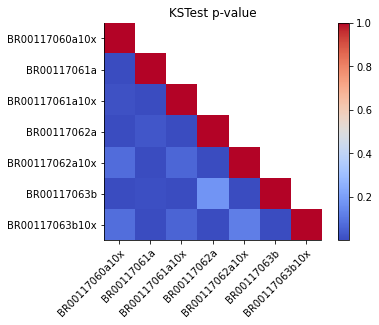

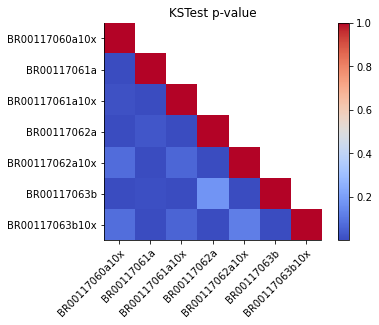

In [21]:
def plot_dataframe_matrix(dataframe: pd.DataFrame, title: str):
    fig, ax = plt.subplots()

    plot_matrix = dataframe.iloc[...,1:].values
    mask = np.triu(np.ones_like(plot_matrix), k=1).astype(bool)
    plot_matrix[mask] = np.nan

    matrix = ax.imshow(plot_matrix, cmap="coolwarm")
    fig.colorbar(matrix)
    ax.set_xticklabels(dataframe.columns, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticklabels(dataframe.columns)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title)
    fig.set_facecolor("white")

    return fig

plot_dataframe_matrix(plot_matrix, "KSTest p-value")

In [12]:

test_df = collated_df.copy()

feature_cats = ["Texture", "RadialDistribution", "Intensity", "Granularity", "Nuclei", "Cells", "Cytoplasm"]

def aggregate_features(dataframe: pd.DataFrame, features: list, essential_match: str = None):
    """
    For a list of features, mean aggregate columns that contain.

    Essential match represents a string that must be matched by all columns
    """
    for feat in feature_cats:
        matches = [feat]
        if essential_match is not None:
            matches.append(essential_match)
        cols = dataframe.columns.values.tolist()
        cols = [col for col in cols if all(match in col for match in matches)]
        mean = dataframe[cols].mean(axis=1)
        dataframe[f"{'_'.join(matches)}"] = mean

    return dataframe

aggregated_df = aggregate_features(test_df, feature_cats, "pvalue")

aggregated_df

,Vendor_plate1,Batch_plate1,Plate_Map_Name_plate1,Assay_Plate_Barcode_plate1,Modality_plate1,Images_per_well_plate1,Sites-SubSampled_plate1,Binning_plate1,Magnification_plate1,Number_of_channels_plate1,...,Nuclei_Texture_Variance_Mito_5_02_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_03_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_03_256_kstest_pvalue,Texture_pvalue,RadialDistribution_pvalue,Intensity_pvalue,Granularity_pvalue,Nuclei_pvalue,Cells_pvalue,Cytoplasm_pvalue
0,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000
1,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,3.778311e-03,0.124624,4.886141e-03,1.424736e-02,0.029616,0.108520,2.377201e-01,0.044400,0.050516,0.046460
2,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,7.025869e-05,0.159574,1.351008e-04,7.661098e-02,0.040198,0.126007,2.312030e-01,0.058651,0.124088,0.112752
3,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,1.167576e-02,0.125825,4.570690e-03,8.026173e-02,0.076328,0.118646,2.298764e-01,0.100996,0.094527,0.094262
4,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,1.623213e-131,0.822584,1.681346e-130,5.124165e-07,0.000149,0.095238,3.771966e-09,0.011836,0.011677,0.010765
5,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,1.321861e-134,0.827516,1.541475e-132,1.004440e-04,0.000163,0.095238,2.328886e-06,0.011979,0.011947,0.010968
6,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,NaN,1,10,4,...,1.713501e-129,0.817099,1.718470e-128,3.260684e-04,0.001278,0.095242,1.527640e-13,0.012595,0.011895,0.010894
7,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,NaN,1,10,4,...,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000
8,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,NaN,1,10,4,...,4.846960e-02,0.102851,3.306485e-02,6.000659e-02,0.031962,0.151101,1.697912e-01,0.054014,0.105427,0.080320
9,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,NaN,1,10,4,...,1.589909e-01,0.089127,9.557471e-02,5.848245e-02,0.024070,0.124191,2.029676e-01,0.054263,0.091374,0.083710


In [ ]:
plot_feature_cats = [i+"_pvalue" for i in feature_cats]

# ft = plot_feature_cats[0]

for ft in plot_feature_cats:
    plot_matrix = create_plot_matrix(aggregated_df, ft)

    fig = plot_dataframe_matrix(plot_matrix, ft)

    fig.savefig(f"pvalue_{ft}.png", dpi=100, bbox_inches = "tight")


In [75]:
# View the top X number of sorted features
# ie. stting combinations that have low/high pvalues

feature_cats = ["Texture", "RadialDistribution", "Intensity", "Granularity", "Nuclei", "Cells", "Cytoplasm"]

aggregated_df = aggregate_features(test_df, feature_cats, "pvalue")

plot_feature_cats = [i+"_pvalue" for i in feature_cats]
setting_cols = [
    # 'Plate_Map_Name',
    # "Assay_Plate_Barcode",
    # 'z_plane',
    'aperture',
    # 'Binning',
    # 'Number_of_channels',
    # 'dry-immersion',
    # 'Modality',
    # 'Images_per_well',
    # 'simultaneous-excitation',
    'sites',
    'Magnification',
    ]

df_list = dict()

ft = plot_feature_cats[0]
p1_setting_cols = [col+"_plate1" for col in setting_cols]
p2_setting_cols = [col+"_plate2" for col in setting_cols]
dup_setting_cols = p1_setting_cols + p2_setting_cols
dup_setting_cols.append(ft)

print(ft)

# Remove pvalue = 1 rows
save_df = aggregated_df[~(aggregated_df[ft] == 1)]

save_df = save_df.sort_values(ft).reset_index()[dup_setting_cols]

save_df

# df_list = dict()

# for ft in plot_feature_cats:
#     p1_setting_cols = [col+"_plate1" for col in setting_cols]
#     p2_setting_cols = [col+"_plate2" for col in setting_cols]
#     dup_setting_cols = p1_setting_cols + p2_setting_cols
#     # dup_setting_cols.append(ft)

#     print(ft)

#     # Remove pvalue = 1 rows
#     save_df = aggregated_df[~(aggregated_df[ft] == 1)]

#     save_df = save_df.sort_values(ft).reset_index()[dup_setting_cols]

#     df_list[ft] = save_df

    # save_df.to_csv(f"sorted_{ft}.csv")


Texture_pvalue


,aperture_plate1,sites_plate1,Magnification_plate1,aperture_plate2,sites_plate2,Magnification_plate2,Texture_pvalue
0,0.45,1,10,0.75,9,20,5.124165e-07
1,0.45,1,10,0.75,9,20,5.360056e-06
2,0.45,1,10,0.75,9,20,9.684827e-06
3,0.45,1,10,0.75,9,20,2.833321e-05
4,0.45,1,10,0.75,9,20,3.119363e-05
5,0.45,1,10,0.75,9,20,5.594242e-05
6,0.45,1,10,0.75,9,20,8.686970e-05
7,0.45,1,10,0.75,9,20,1.004440e-04
8,0.45,1,10,0.75,9,20,1.317930e-04
9,0.45,1,10,0.75,9,20,1.428395e-04


In [74]:
# Do all of the settings influence the p-value equally? Ie. same settings
# outperform other settings routinely
df_list[list(df_list.keys())[0]] == df_list[list(df_list.keys())[6]]

,aperture_plate1,sites_plate1,Magnification_plate1,aperture_plate2,sites_plate2,Magnification_plate2
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True


1. Combine AssayPlateBarcode_plate1/2 into a single column
   1. This column will be "_".join aggregated
2. Group the dataframe by the setting columns
   1. These columns will be used to show that two profiles are derived from the same settings
3. Join aggregate assay_plate_barcode and then mean all other columns that are not groupby'd
4. Merge the duplicate setting columns
   1. ie. Magnification_Plate1/2 becomes Magnification

In [76]:
# Aggregate duplicate settings

# Combine Assay_Plate_Barcode_plate1/2
collated_df['Assay_Plate_Barcode'] = collated_df[['Assay_Plate_Barcode_plate1', 'Assay_Plate_Barcode_plate2']].agg('_'.join, axis=1)

setting_cols = [
    # 'Plate_Map_Name',
    'z_plane',
    'aperture',
    'Binning',
    'Number_of_channels',
    'dry-immersion',
    'Modality',
    'Images_per_well',
    'simultaneous-excitation',
    'sites',
    'Magnification',
    ]

def aggregate_similar_comparisons(collated_dataframe: pd.DataFrame, setting_column_names: list):

    p1_setting_cols = [col+"_plate1" for col in setting_column_names]
    p2_setting_cols = [col+"_plate2" for col in setting_column_names]
    dup_setting_cols = p1_setting_cols + p2_setting_cols

    eval_df = pd.DataFrame()
    for p1_set, p2_set in zip(p1_setting_cols, p2_setting_cols):
        if all(collated_dataframe[p1_set].isna()) and all(collated_dataframe[p2_set].isna()):
            # If a setting column is entirely NaN, exclude it since 
            # np.nan == np.nan = False
            continue
        comparison = collated_dataframe[p1_set] == collated_dataframe[p2_set]
        comparison.name = p1_set
        eval_df = pd.concat([eval_df, comparison], axis=1)

    # Between the two compared plates, determine those that have diverging settings
    # and can therefore not be merged
    collated_dataframe["merge_check"] = eval_df.all(axis=1)

    # Now we know which rows compare two plates that have the **same settings** and
    # can thus be aggregated with other rows that also compare the **same settings**
    # That is, we can aggregate the subset of rows where ["merge_check"] == True
    agg_subset = collated_dataframe[collated_dataframe["merge_check"] == True]
    non_agg_subset = collated_dataframe[collated_dataframe["merge_check"] == False]

    # feat_cols = [feat_col for feat_col in agg_subset.columns if feat_col not in dup_setting_cols]
    feat_cols = agg_subset.filter(regex='pvalue|kstest_statistic').columns

    # Let's create a dict to say that we wanna find the mean of each feature column
    merge_dict = {k: np.mean for k in feat_cols}

    # Aggregation of barcode strings
    merge_dict.update({"Assay_Plate_Barcode": "_".join})

    agg_subset = agg_subset.groupby(dup_setting_cols, dropna=False) \
                        .agg(merge_dict) \
                        .reset_index()

    # Concatenate the data and preserve the columns that survived aggregation for
    # the non-aggregated dataset
    merged_df = pd.concat([agg_subset, non_agg_subset[agg_subset.columns]], axis=0)

    return merged_df

aggregated_df = aggregate_similar_comparisons(collated_df, setting_cols)
aggregated_df

,z_plane_plate1,aperture_plate1,Binning_plate1,Number_of_channels_plate1,dry-immersion_plate1,Modality_plate1,Images_per_well_plate1,simultaneous-excitation_plate1,sites_plate1,Magnification_plate1,...,Nuclei_Texture_Variance_Mito_20_03_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_00_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_00_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_01_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_01_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_02_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_02_256_kstest_pvalue,Nuclei_Texture_Variance_Mito_5_03_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_03_256_kstest_pvalue,Assay_Plate_Barcode
0,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,4.637381e-01,0.065086,4.328110e-01,0.069071,4.323251e-01,0.067544,4.319395e-01,0.069337,4.218271e-01,BR00117060a10x_BR00117060a10x_BR00117060a10x_B...
1,1,0.75,1,4,dry,Widefield,9,NaN,9,20,...,5.828415e-01,0.042101,6.096322e-01,0.042101,6.179544e-01,0.041233,6.216054e-01,0.043403,6.139527e-01,BR00117061a_BR00117061a_BR00117061a_BR00117062...
4,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,1.188790e-227,0.824911,1.623218e-131,0.827626,1.541469e-132,0.825022,1.623213e-131,0.822584,1.681346e-130,BR00117060a10x_BR00117061a
5,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,9.034807e-225,0.830175,1.439592e-133,0.830286,1.439590e-133,0.832945,1.321861e-134,0.827516,1.541475e-132,BR00117060a10x_BR00117062a
6,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,2.554532e-222,0.819925,1.713493e-129,0.819814,1.713501e-129,0.819814,1.713501e-129,0.817099,1.718470e-128,BR00117060a10x_BR00117063b
10,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,2.402874e-227,0.866979,1.559745e-148,0.861896,2.952285e-146,0.864437,2.168351e-147,0.858854,3.938284e-145,BR00117061a10x_BR00117061a
11,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,3.077657e-217,0.869833,1.098409e-149,0.867229,1.559734e-148,0.869771,1.098411e-149,0.861771,2.952293e-146,BR00117061a10x_BR00117062a
12,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,4.004950e-215,0.856812,5.147959e-144,0.856688,5.148793e-144,0.861958,2.952259e-146,0.854083,6.599654e-143,BR00117061a10x_BR00117063b
15,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,9.034807e-225,0.830064,1.439623e-133,0.830341,1.439589e-133,0.827682,1.541468e-132,0.822640,1.681324e-130,BR00117062a10x_BR00117061a
16,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,3.428709e-222,0.830175,1.439592e-133,0.835605,1.193084e-135,0.832945,1.321861e-134,0.827516,1.541475e-132,BR00117062a10x_BR00117062a


In [79]:
# View the top X number of sorted features
# ie. stting combinations that have low/high pvalues

feature_cats = ["Texture", "RadialDistribution", "Intensity", "Granularity", "Nuclei", "Cells", "Cytoplasm"]

aggregated_df_2 = aggregate_features(aggregated_df, feature_cats, "pvalue")

plot_feature_cats = [i+"_pvalue" for i in feature_cats]
setting_cols = [
    # 'Plate_Map_Name',
    # "Assay_Plate_Barcode",
    # 'z_plane',
    'aperture',
    # 'Binning',
    # 'Number_of_channels',
    # 'dry-immersion',
    # 'Modality',
    # 'Images_per_well',
    # 'simultaneous-excitation',
    'sites',
    'Magnification',
    ]

df_list = dict()

ft = plot_feature_cats[0]
p1_setting_cols = [col+"_plate1" for col in setting_cols]
p2_setting_cols = [col+"_plate2" for col in setting_cols]
dup_setting_cols = p1_setting_cols + p2_setting_cols
dup_setting_cols.append(ft)
dup_setting_cols.append("Assay_Plate_Barcode")

print(ft)

# Remove pvalue = 1 rows
save_df = aggregated_df_2[~(aggregated_df_2[ft] == 1)]

save_df = save_df.sort_values(ft).reset_index()[dup_setting_cols]

save_df

Texture_pvalue


,aperture_plate1,sites_plate1,Magnification_plate1,aperture_plate2,sites_plate2,Magnification_plate2,Texture_pvalue,Assay_Plate_Barcode
0,0.45,1,10,0.75,9,20,5.124165e-07,BR00117060a10x_BR00117061a
1,0.45,1,10,0.75,9,20,5.360056e-06,BR00117062a10x_BR00117061a
2,0.45,1,10,0.75,9,20,9.684827e-06,BR00117061a10x_BR00117061a
3,0.45,1,10,0.75,9,20,2.833321e-05,BR00117061a10x_BR00117063b
4,0.45,1,10,0.75,9,20,3.119363e-05,BR00117061a10x_BR00117062a
5,0.45,1,10,0.75,9,20,5.594242e-05,BR00117062a10x_BR00117062a
6,0.45,1,10,0.75,9,20,8.686970e-05,BR00117063b10x_BR00117061a
7,0.45,1,10,0.75,9,20,1.004440e-04,BR00117060a10x_BR00117062a
8,0.45,1,10,0.75,9,20,1.317930e-04,BR00117062a10x_BR00117063b
9,0.45,1,10,0.75,9,20,1.428395e-04,BR00117063b10x_BR00117062a


In [81]:
aggregated_df_2

,z_plane_plate1,aperture_plate1,Binning_plate1,Number_of_channels_plate1,dry-immersion_plate1,Modality_plate1,Images_per_well_plate1,simultaneous-excitation_plate1,sites_plate1,Magnification_plate1,...,Nuclei_Texture_Variance_Mito_5_03_256_kstest_statistic,Nuclei_Texture_Variance_Mito_5_03_256_kstest_pvalue,Assay_Plate_Barcode,Texture_pvalue,RadialDistribution_pvalue,Intensity_pvalue,Granularity_pvalue,Nuclei_pvalue,Cells_pvalue,Cytoplasm_pvalue
0,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.069337,4.218271e-01,BR00117060a10x_BR00117060a10x_BR00117060a10x_B...,4.409220e-01,0.432035,0.482954,5.334197e-01,0.441459,0.461148,0.457725
1,1,0.75,1,4,dry,Widefield,9,NaN,9,20,...,0.043403,6.139527e-01,BR00117061a_BR00117061a_BR00117061a_BR00117062...,5.351861e-01,0.515400,0.568642,5.328924e-01,0.536479,0.541485,0.540878
4,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.822584,1.681346e-130,BR00117060a10x_BR00117061a,5.124165e-07,0.000149,0.095238,3.771966e-09,0.011836,0.011677,0.010765
5,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.827516,1.541475e-132,BR00117060a10x_BR00117062a,1.004440e-04,0.000163,0.095238,2.328886e-06,0.011979,0.011947,0.010968
6,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.817099,1.718470e-128,BR00117060a10x_BR00117063b,3.260684e-04,0.001278,0.095242,1.527640e-13,0.012595,0.011895,0.010894
10,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.858854,3.938284e-145,BR00117061a10x_BR00117061a,9.684827e-06,0.005833,0.095238,2.089771e-05,0.011765,0.012670,0.010987
11,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.861771,2.952293e-146,BR00117061a10x_BR00117062a,3.119363e-05,0.005876,0.095238,9.648170e-04,0.012048,0.012966,0.012002
12,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.854083,6.599654e-143,BR00117061a10x_BR00117063b,2.833321e-05,0.009971,0.095239,2.015630e-04,0.012712,0.012388,0.012101
15,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.822640,1.681324e-130,BR00117062a10x_BR00117061a,5.360056e-06,0.000577,0.095238,2.265736e-06,0.011786,0.011747,0.010766
16,1,0.45,1,4,dry,Widefield,1,NaN,1,10,...,0.827516,1.541475e-132,BR00117062a10x_BR00117062a,5.594242e-05,0.004624,0.095243,9.321637e-04,0.012337,0.012872,0.011298


In [92]:
plot_feature_cats = [i+"_pvalue" for i in feature_cats]

for ft in plot_feature_cats:
    plot_matrix = create_plot_matrix(aggregated_df_2, ft, plates_col="Assay_Plate_Barcode")

    fig = plot_dataframe_matrix(plot_matrix, ft)

    fig.savefig(f"aggregated_pvalue_{ft}.png", dpi=100, bbox_inches = "tight")


KeyError: 'Assay_Plate_Barcode_plate1'

In [90]:
collated_df["Vendor_plate1"].to_list()

['Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon',
 'Nikon']

In [93]:
pd.read_csv("/Users/ctromans/Downloads/cell_health_merged_feature_select.csv.gz")

,Metadata_Plate,Metadata_Well,Metadata_WellCol,Metadata_WellRow,Metadata_cell_line,Metadata_gene_name,Metadata_pert_name,Cells_AreaShape_Compactness,Cells_AreaShape_Extent,Cells_AreaShape_Zernike_0_0,...,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_InverseDifferenceMoment_RNA_10_0,Nuclei_Texture_InverseDifferenceMoment_RNA_20_0,Nuclei_Texture_SumAverage_AGP_5_0,Nuclei_Texture_SumAverage_ER_5_0,Nuclei_Texture_SumAverage_Mito_20_0,Nuclei_Texture_SumAverage_RNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0
0,SQ00014618,A01,1,A,HCC44,EMPTY,EMPTY,-1.515696,0.810956,1.984031,...,-1.365392,-0.351107,-0.163153,2.307568,-2.775524,-3.951667,-1.716353,-2.703082,-3.720976,0.107581
1,SQ00014618,A02,2,A,HCC44,MCL1,MCL1-5,0.246423,0.687241,0.062305,...,-0.070069,1.855687,-0.400335,3.776635,0.947498,-0.541032,0.363568,0.910251,-0.364015,0.165935
2,SQ00014618,A03,3,A,HCC44,AKT1,AKT1-1,0.416772,0.151184,-0.045541,...,-1.491414,0.377266,-0.540338,1.743963,-0.510880,-2.206918,-1.440147,-0.571847,-2.261104,-1.358338
3,SQ00014618,A04,4,A,HCC44,KRAS,KRAS-2B,0.645336,-0.290637,-0.455894,...,-0.956379,0.116267,0.338568,1.467339,-0.749321,-1.318064,-1.466339,-1.060094,-2.056278,-0.975661
4,SQ00014618,A05,5,A,HCC44,AKT1,AKT1-2,0.159822,0.308919,-0.195773,...,-1.200222,0.152902,-0.833538,2.129282,-0.719243,-0.198956,-0.702847,-1.291783,-1.299857,-0.575835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,SQ00014614,P20,20,P,ES2,Chr2,Chr2-4,0.451533,0.359638,-0.794496,...,0.300065,-0.071462,0.352070,1.321113,-1.971507,-1.514677,-1.091666,-1.703161,-1.478644,-0.661679
3452,SQ00014614,P21,21,P,ES2,EMPTY,EMPTY,-0.634375,0.579012,0.391367,...,-0.225162,-0.902700,-1.182598,4.602732,-2.247891,-0.660906,-0.369147,-1.592267,-0.341695,0.678124
3453,SQ00014614,P22,22,P,ES2,POLR2D,POLR2D-2,1.594224,-3.129512,-1.709079,...,6.218380,0.956415,-0.096341,3.454834,-1.409472,-2.727640,0.947550,-1.705163,-1.378611,1.084216
3454,SQ00014614,P23,23,P,ES2,PPIB,PPIB-2,0.409074,0.006340,-0.617164,...,1.651254,-0.780409,-0.495296,3.888760,-3.575386,-2.726114,-1.687678,-4.112048,-1.885357,0.287037


In [101]:
# test_df = pd.read_csv("/Users/ctromans/Downloads/JUMP-MOA_compound_metadata.tsv", sep="\t")
test_df = pd.read_csv("/Users/ctromans/Downloads/JUMP-Target-1_compound_metadata_additional_annotations.tsv", sep="\t")

# len(test_df["moa"].unique())
len(test_df["target_list"].unique())

# test_df.columns

267

In [104]:
df = pd.read_csv("/Users/ctromans/Desktop/input/Scope1_Nikon_10X/BR00117060a10x/BR00117060a10x_normalized_feature_select_negcon_plate.csv.gz")

df.groupby("Metadata_pert_iname").count()


,Metadata_broad_sample,Metadata_solvent,Metadata_Plate,Metadata_Well,Metadata_InChIKey,Metadata_pubchem_cid,Metadata_moa,Metadata_pert_type,Metadata_control_type,Metadata_smiles,...,Nuclei_Texture_InverseDifferenceMoment_AGP_5_01_256,Nuclei_Texture_SumAverage_ER_10_01_256,Nuclei_Texture_SumVariance_AGP_10_01_256,Nuclei_Texture_SumVariance_ER_10_03_256,Nuclei_Texture_SumVariance_Mito_10_01_256,Metadata_Site_Count,Metadata_Count_Cells,Metadata_Count_Cytoplasm,Metadata_Count_Nuclei,Metadata_Object_Count
Metadata_pert_iname,,,,,,,,,,,,,,,,,,,,,
A-366,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
ABT-737,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
AMG-925,4,4,4,4,4,0,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
AMG900,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
APY0201,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
selumetinib,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
sirolimus,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
skepinone-l,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
